# Practice Lab - Advice for Applying Machine Learning
In this lab, you will explore techniques to evaluate and improve your machine learning models.

# Outline
- [ 1 - Packages ](#1)
- [ 2 - Evaluating a Learning Algorithm (Polynomial Regression)](#2)
  - [ 2.1 Splitting your data set](#2.1)
  - [ 2.2 Error calculation for model evaluation, linear regression](#2.2)
    - [ Exercise 1](#ex01)
  - [ 2.3 Compare performance on training and test data](#2.3)
- [ 3 - Bias and Variance<img align="Right" src="./images/C2_W3_BiasVarianceDegree.png"  style=" width:500px; padding: 10px 20px ; "> ](#3)
  - [ 3.1 Plot Train, Cross-Validation, Test](#3.1)
  - [ 3.2 Finding the optimal degree](#3.2)
  - [ 3.3 Tuning Regularization.](#3.3)
  - [ 3.4 Getting more data: Increasing Training Set Size (m)](#3.4)
- [ 4 - Evaluating a Learning Algorithm (Neural Network)](#4)
  - [ 4.1 Data Set](#4.1)
  - [ 4.2 Evaluating categorical model by calculating classification error](#4.2)
    - [ Exercise 2](#ex02)
- [ 5 - Model Complexity](#5)
  - [ Exercise 3](#ex03)
  - [ 5.1 Simple model](#5.1)
    - [ Exercise 4](#ex04)
- [ 6 - Regularization](#6)
  - [ Exercise 5](#ex05)
- [ 7 - Iterate to find optimal regularization value](#7)
  - [ 7.1 Test](#7.1)


<a name="1"></a>
## 1 - Packages 

First, let's run the cell below to import all the packages that you will need during this assignment.
- [numpy](https://numpy.org/) is the fundamental package for scientific computing Python.
- [matplotlib](http://matplotlib.org) is a popular library to plot graphs in Python.
- [scikitlearn](https://scikit-learn.org/stable/) is a basic library for data mining
- [tensorflow](https://www.tensorflow.org/) a popular platform for machine learning.

In [1]:
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import relu,linear
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)

from public_tests_a1 import * 

tf.keras.backend.set_floatx('float64')
from assigment_utils import *

tf.autograph.set_verbosity(0)

<a name="2"></a>
## 2 - Evaluating a Learning Algorithm (Polynomial Regression)

<img align="Right" src="./images/C2_W3_TrainingVsNew.png"  style=" width:350px; padding: 10px 20px ; "> Let's say you have created a machine learning model and you find it *fits* your training data very well. You're done? Not quite. The goal of creating the model was to be able to predict values for <span style="color:blue">*new* </span> examples. 

How can you test your model's performance on new data before deploying it?   
The answer has two parts:
* Split your original data set into "Training" and "Test" sets. 
    * Use the training data to fit the parameters of the model
    * Use the test data to evaluate the model on *new* data
* Develop an error function to evaluate your model.

<a name="2.1"></a>
### 2.1 Splitting your data set
Lectures advised reserving 20-40% of your data set for testing. Let's use an `sklearn` function [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) to perform the split. Double-check the shapes after running the following cell.

In [2]:
# Generate some data
X,y,x_ideal,y_ideal = gen_data(18, 2, 0.7)
print("X.shape", X.shape, "y.shape", y.shape)

#split the data using sklearn routine 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=1)
print("X_train.shape", X_train.shape, "y_train.shape", y_train.shape)
print("X_test.shape", X_test.shape, "y_test.shape", y_test.shape)

X.shape (18,) y.shape (18,)
X_train.shape (12,) y_train.shape (12,)
X_test.shape (6,) y_test.shape (6,)


#### 2.1.1 Plot Train, Test sets
You can see below the data points that will be part of training (in red) are intermixed with those that the model is not trained on (test). This particular data set is a quadratic function with noise added. The "ideal" curve is shown for reference.

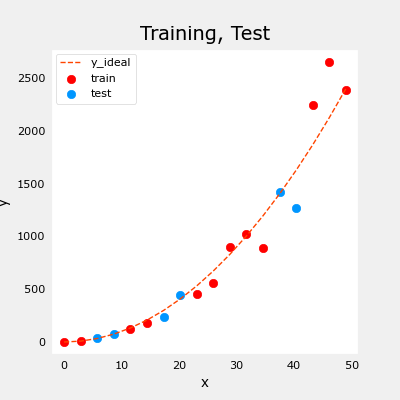

In [3]:
fig, ax = plt.subplots(1,1,figsize=(4,4))
ax.plot(x_ideal, y_ideal, "--", color = "orangered", label="y_ideal", lw=1)
ax.set_title("Training, Test",fontsize = 14)
ax.set_xlabel("x")
ax.set_ylabel("y")

ax.scatter(X_train, y_train, color = "red",           label="train")
ax.scatter(X_test, y_test,   color = dlc["dlblue"],   label="test")
ax.legend(loc='upper left')
plt.show()

<a name="2.2"></a>
### 2.2 Error calculation for model evaluation, linear regression
When *evaluating* a linear regression model, you average the squared error difference of the predicted values and the target values.

$$ J_\text{test}(\mathbf{w},b) = 
            \frac{1}{2m_\text{test}}\sum_{i=0}^{m_\text{test}-1} ( f_{\mathbf{w},b}(\mathbf{x}^{(i)}_\text{test}) - y^{(i)}_\text{test} )^2 
            \tag{1}
$$

<a name="ex01"></a>
### Exercise 1

Below, create a function to evaluate the error on a data set for a linear regression model.

In [6]:
# UNQ_C1
# GRADED CELL: eval_mse
def eval_mse(y, yhat):
    """ 
    Calculate the mean squared error on a data set.
    Args:
      y    : (ndarray  Shape (m,) or (m,1))  target value of each example
      yhat : (ndarray  Shape (m,) or (m,1))  predicted value of each example
    Returns:
      err: (scalar)             
    """
    m = len(y)
    err = 0.0
    for i in range(m):
    ### START CODE HERE ### 
        err += (y[i] - yhat[i]) ** 2
    err /= (m * 2)
    ### END CODE HERE ### 
    
    return(err)

In [7]:
y_hat = np.array([2.4, 4.2])
y_tmp = np.array([2.3, 4.1])
eval_mse(y_hat, y_tmp)

# BEGIN UNIT TEST
test_eval_mse(eval_mse)   
# END UNIT TEST

 All tests passed.


<details>
  <summary><font size="3" color="darkgreen"><b>Click for hints</b></font></summary>

    
```python
def eval_mse(y, yhat):
    """ 
    Calculate the mean squared error on a data set.
    Args:
      y    : (ndarray  Shape (m,) or (m,1))  target value of each example
      yhat : (ndarray  Shape (m,) or (m,1))  predicted value of each example
    Returns:
      err: (scalar)             
    """
    m = len(y)
    err = 0.0
    for i in range(m):
        err_i  = ( (yhat[i] - y[i])**2 ) 
        err   += err_i                                                                
    err = err / (2*m)                    
    return(err)
``` 

<a name="2.3"></a>
### 2.3 Compare performance on training and test data
Let's build a high degree polynomial model to minimize training error. This will use the linear_regression functions from `sklearn`. The code is in the imported utility file if you would like to see the details. The steps below are:
* create and fit the model. ('fit' is another name for training or running gradient descent).
* compute the error on the training data.
* compute the error on the test data.

In [8]:
# create a model in sklearn, train on training data
degree = 10
lmodel = lin_model(degree)
lmodel.fit(X_train, y_train)

# predict on training data, find training error
yhat = lmodel.predict(X_train)
err_train = lmodel.mse(y_train, yhat)

# predict on test data, find error
yhat = lmodel.predict(X_test)
err_test = lmodel.mse(y_test, yhat)

The computed error on the training set is substantially less than that of the test set. 

In [9]:
print(f"training err {err_train:0.2f}, test err {err_test:0.2f}")

training err 58.01, test err 171215.01


The following plot shows why this is. The model fits the training data very well. To do so, it has created a complex function. The test data was not part of the training and the model does a poor job of predicting on this data.  
This model would be described as 1) is overfitting, 2) has high variance 3) 'generalizes' poorly.

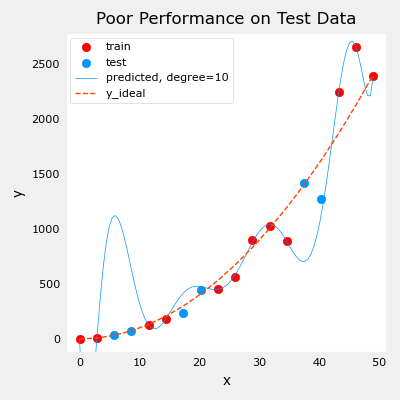

In [10]:
# plot predictions over data range 
x = np.linspace(0,int(X.max()),100)  # predict values for plot
y_pred = lmodel.predict(x).reshape(-1,1)

plt_train_test(X_train, y_train, X_test, y_test, x, y_pred, x_ideal, y_ideal, degree)

The test set error shows this model will not work well on new data. If you use the test error to guide improvements in the model, then the model will perform well on the test data... but the test data was meant to represent *new* data.
You need yet another set of data to test new data performance.

The proposal made during lecture is to separate data into three groups. The distribution of training, cross-validation and test sets shown in the below table is a typical distribution, but can be varied depending on the amount of data available.

| data             | % of total | Description |
|------------------|:----------:|:---------|
| training         | 60         | Data used to tune model parameters $w$ and $b$ in training or fitting |
| cross-validation | 20         | Data used to tune other model parameters like degree of polynomial, regularization or the architecture of a neural network.|
| test             | 20         | Data used to test the model after tuning to gauge performance on new data |


Let's generate three data sets below. We'll once again use `train_test_split` from `sklearn` but will call it twice to get three splits:

In [11]:
# Generate  data
X,y, x_ideal,y_ideal = gen_data(40, 5, 0.7)
print("X.shape", X.shape, "y.shape", y.shape)

#split the data using sklearn routine 
X_train, X_, y_train, y_ = train_test_split(X,y,test_size=0.40, random_state=1)
X_cv, X_test, y_cv, y_test = train_test_split(X_,y_,test_size=0.50, random_state=1)
print("X_train.shape", X_train.shape, "y_train.shape", y_train.shape)
print("X_cv.shape", X_cv.shape, "y_cv.shape", y_cv.shape)
print("X_test.shape", X_test.shape, "y_test.shape", y_test.shape)

X.shape (40,) y.shape (40,)
X_train.shape (24,) y_train.shape (24,)
X_cv.shape (8,) y_cv.shape (8,)
X_test.shape (8,) y_test.shape (8,)


<a name="3"></a>
## 3 - Bias and Variance<img align="Right" src="./images/C2_W3_BiasVarianceDegree.png"  style=" width:500px; padding: 10px 20px ; "> 
 Above, it was clear the degree of the polynomial model was too high. How can you choose a good value? It turns out, as shown in the diagram, the training and cross-validation performance can provide guidance. By trying a range of degree values, the training and cross-validation performance can be evaluated. As the degree becomes too large, the cross-validation performance will start to degrade relative to the training performance. Let's try this on our example.

<a name="3.1"></a>
### 3.1 Plot Train, Cross-Validation, Test
You can see below the datapoints that will be part of training (in red) are intermixed with those that the model is not trained on (test and cv).

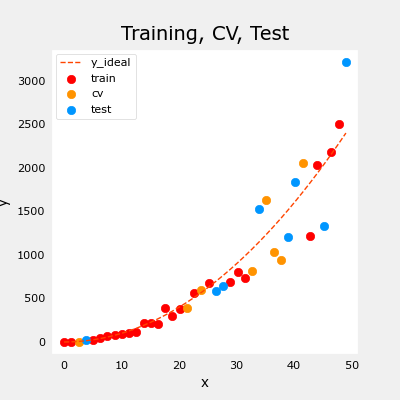

In [12]:
fig, ax = plt.subplots(1,1,figsize=(4,4))
ax.plot(x_ideal, y_ideal, "--", color = "orangered", label="y_ideal", lw=1)
ax.set_title("Training, CV, Test",fontsize = 14)
ax.set_xlabel("x")
ax.set_ylabel("y")

ax.scatter(X_train, y_train, color = "red",           label="train")
ax.scatter(X_cv, y_cv,       color = dlc["dlorange"], label="cv")
ax.scatter(X_test, y_test,   color = dlc["dlblue"],   label="test")
ax.legend(loc='upper left')
plt.show()

<a name="3.2"></a>
### 3.2 Finding the optimal degree
In previous labs, you found that you could create a model capable of fitting complex curves by utilizing a polynomial (See Course1, Week2 Feature Engineering and Polynomial Regression Lab).  Further, you demonstrated that by increasing the *degree* of the polynomial, you could *create* overfitting. (See Course 1, Week3, Over-Fitting Lab). Let's use that knowledge here to test our ability to tell the difference between over-fitting and under-fitting.

Let's train the model repeatedly, increasing the degree of the polynomial each iteration. Here, we're going to use the [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression) linear regression model for speed and simplicity.

In [14]:
max_degree = 9
err_train = np.zeros(max_degree)    
err_cv = np.zeros(max_degree)      
x = np.linspace(0,int(X.max()),100)  
y_pred = np.zeros((100,max_degree))  #columns are lines to plot

for degree in range(max_degree):
    lmodel = lin_model(degree+1)
    lmodel.fit(X_train, y_train)
    yhat = lmodel.predict(X_train)
    err_train[degree] = lmodel.mse(y_train, yhat)
    yhat = lmodel.predict(X_cv)
    err_cv[degree] = lmodel.mse(y_cv, yhat)
    y_pred[:,degree] = lmodel.predict(x)
    
optimal_degree = np.argmin(err_cv)+1

<font size="4">Let's plot the result:</font>

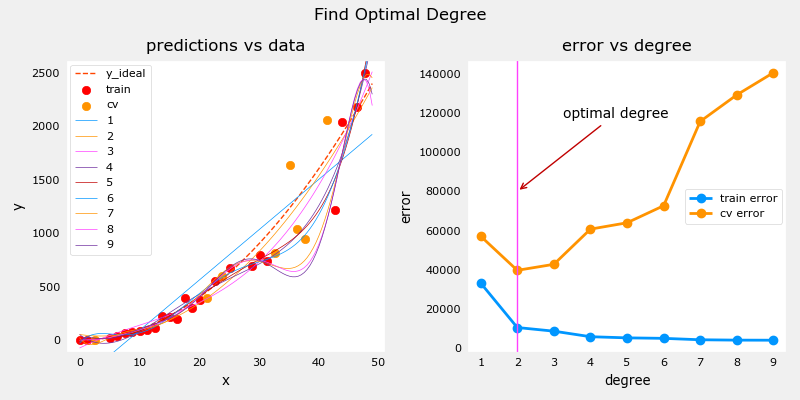

In [15]:
plt.close("all")
plt_optimal_degree(X_train, y_train, X_cv, y_cv, x, y_pred, x_ideal, y_ideal, 
                   err_train, err_cv, optimal_degree, max_degree)

The plot above demonstrates that separating data into two groups, data the model is trained on and data the model has not been trained on, can be used to determine if the model is underfitting or overfitting. In our example, we created a variety of models varying from underfitting to overfitting by increasing the degree of the polynomial used. 
- On the left plot, the solid lines represent the predictions from these models. A polynomial model with degree 1 produces a straight line that intersects very few data points, while the maximum degree hews very closely to every data point. 
- on the right:
    - the error on the trained data (blue) decreases as the model complexity increases as expected
    - the error of the cross-validation data decreases initially as the model starts to conform to the data, but then increases as the model starts to over-fit on the training data (fails to *generalize*).     
    
It's worth noting that the curves in these examples as not as smooth as one might draw for a lecture. It's clear the specific data points assigned to each group can change your results significantly. The general trend is what is important.

<a name="3.3"></a>
### 3.3 Tuning Regularization.
In previous labs, you have utilized *regularization* to reduce overfitting. Similar to degree, one can use the same methodology to tune the regularization parameter lambda ($\lambda$).

Let's demonstrate this by starting with a high degree polynomial and varying the regularization parameter.

In [16]:
lambda_range = np.array([0.0, 1e-6, 1e-5, 1e-4,1e-3,1e-2, 1e-1,1,10,100])
num_steps = len(lambda_range)
degree = 10
err_train = np.zeros(num_steps)    
err_cv = np.zeros(num_steps)       
x = np.linspace(0,int(X.max()),100) 
y_pred = np.zeros((100,num_steps))  #columns are lines to plot

for i in range(num_steps):
    lambda_= lambda_range[i]
    lmodel = lin_model(degree, regularization=True, lambda_=lambda_)
    lmodel.fit(X_train, y_train)
    yhat = lmodel.predict(X_train)
    err_train[i] = lmodel.mse(y_train, yhat)
    yhat = lmodel.predict(X_cv)
    err_cv[i] = lmodel.mse(y_cv, yhat)
    y_pred[:,i] = lmodel.predict(x)
    
optimal_reg_idx = np.argmin(err_cv) 

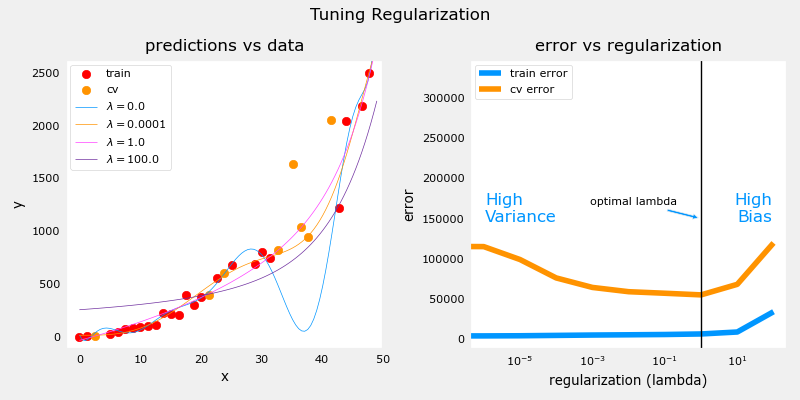

In [17]:
plt.close("all")
plt_tune_regularization(X_train, y_train, X_cv, y_cv, x, y_pred, err_train, err_cv, optimal_reg_idx, lambda_range)

Above, the plots show that as regularization increases, the model moves from a high variance (overfitting) model to a high bias (underfitting) model. The vertical line in the right plot shows the optimal value of lambda. In this example, the polynomial degree was set to 10. 

<a name="3.4"></a>
### 3.4 Getting more data: Increasing Training Set Size (m)
When a model is overfitting (high variance), collecting additional data can improve performance. Let's try that here.

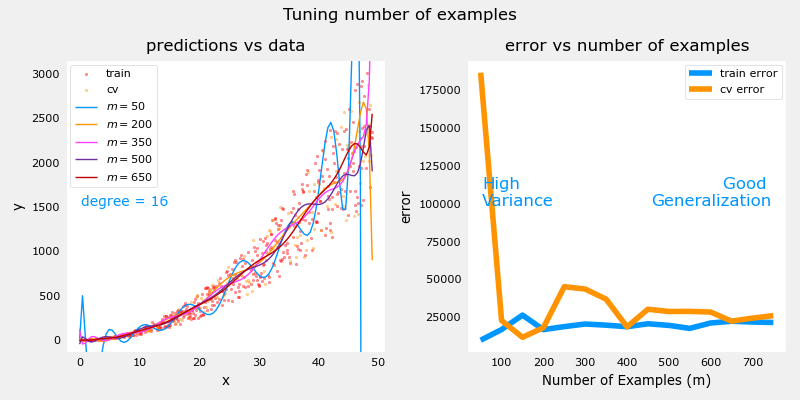

In [18]:
X_train, y_train, X_cv, y_cv, x, y_pred, err_train, err_cv, m_range,degree = tune_m()
plt_tune_m(X_train, y_train, X_cv, y_cv, x, y_pred, err_train, err_cv, m_range, degree)

The above plots show that when a model has high variance and is overfitting, adding more examples improves performance. Note the curves on the left plot. The final curve with the highest value of $m$ is a smooth curve that is in the center of the data. On the right, as the number of examples increases, the performance of the training set and cross-validation set converge to similar values. Note that the curves are not as smooth as one might see in a lecture. That is to be expected. The trend remains clear: more data improves generalization. 

> Note that adding more examples when the model has high bias (underfitting) does not improve performance.


<a name="4"></a>
## 4 - Evaluating a Learning Algorithm (Neural Network)
Above, you tuned aspects of a polynomial regression model. Here, you will work with a neural network model. Let's start by creating a classification data set. 

<a name="4.1"></a>
### 4.1 Data Set
Run the cell below to generate a data set and split it into training, cross-validation (CV) and test sets. In this example, we're increasing the percentage of cross-validation data points for emphasis.  

In [19]:
# Generate and split data set
X, y, centers, classes, std = gen_blobs()

# split the data. Large CV population for demonstration
X_train, X_, y_train, y_ = train_test_split(X,y,test_size=0.50, random_state=1)
X_cv, X_test, y_cv, y_test = train_test_split(X_,y_,test_size=0.20, random_state=1)
print("X_train.shape:", X_train.shape, "X_cv.shape:", X_cv.shape, "X_test.shape:", X_test.shape)

X_train.shape: (400, 2) X_cv.shape: (320, 2) X_test.shape: (80, 2)


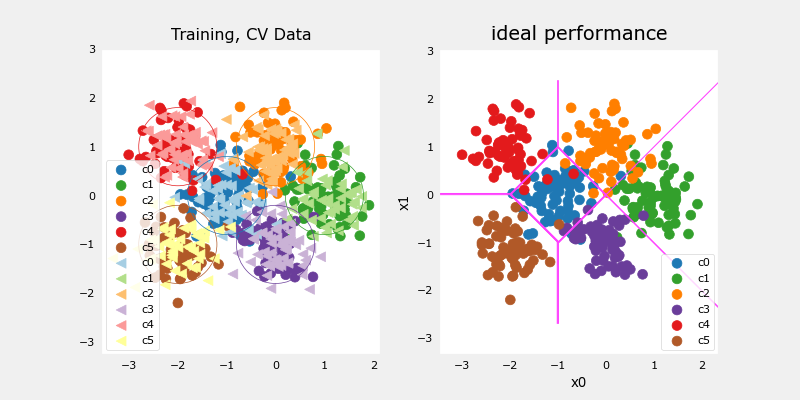

In [20]:
plt_train_eq_dist(X_train, y_train,classes, X_cv, y_cv, centers, std)

Above, you can see the data on the left. There are six clusters identified by color. Both training points (dots) and cross-validataion points (triangles) are shown. The interesting points are those that fall in ambiguous locations where either cluster might consider them members. What would you expect a neural network model to do? What would be an example of overfitting? underfitting?  
On the right is an example of an 'ideal' model, or a model one might create knowing the source of the data. The lines represent 'equal distance' boundaries where the distance between center points is equal. It's worth noting that this model would "misclassify" roughly 8% of the total data set.

<a name="4.2"></a>
### 4.2 Evaluating categorical model by calculating classification error
The evaluation function for categorical models used here is simply the fraction of incorrect predictions:  
$$ J_{cv} =\frac{1}{m}\sum_{i=0}^{m-1} 
\begin{cases}
    1, & \text{if $\hat{y}^{(i)} \neq y^{(i)}$}\\
    0, & \text{otherwise}
\end{cases}
$$

<a name="ex02"></a>
### Exercise 2

Below, complete the routine to calculate classification error. Note, in this lab, target values are the index of the category and are not [one-hot encoded](https://en.wikipedia.org/wiki/One-hot).

In [33]:
# UNQ_C2
# GRADED CELL: eval_cat_err
def eval_cat_err(y, yhat):
    """ 
    Calculate the categorization error
    Args:
      y    : (ndarray  Shape (m,) or (m,1))  target value of each example
      yhat : (ndarray  Shape (m,) or (m,1))  predicted value of each example
    Returns:|
      cerr: (scalar)             
    """
    m = len(y)
    incorrect = 0
    for i in range(m):
    ### START CODE HERE ### 
        if y[i] != yhat[i]:
            incorrect += 1
    cerr = incorrect / m
    ### END CODE HERE ### 
    
    return(cerr)

In [34]:
y_hat = np.array([1, 2, 0])
y_tmp = np.array([1, 2, 3])
print(f"categorization error {np.squeeze(eval_cat_err(y_hat, y_tmp)):0.3f}, expected:0.333" )
y_hat = np.array([[1], [2], [0], [3]])
y_tmp = np.array([[1], [2], [1], [3]])
print(f"categorization error {np.squeeze(eval_cat_err(y_hat, y_tmp)):0.3f}, expected:0.250" )

# BEGIN UNIT TEST  
test_eval_cat_err(eval_cat_err)
# END UNIT TEST
# BEGIN UNIT TEST  
test_eval_cat_err(eval_cat_err)
# END UNIT TEST

categorization error 0.333, expected:0.333
categorization error 0.250, expected:0.250
 All tests passed.
 All tests passed.


<details>
  <summary><font size="3" color="darkgreen"><b>Click for hints</b></font></summary>
    
```python
def eval_cat_err(y, yhat):
    """ 
    Calculate the categorization error
    Args:
      y    : (ndarray  Shape (m,) or (m,1))  target value of each example
      yhat : (ndarray  Shape (m,) or (m,1))  predicted value of each example
    Returns:|
      cerr: (scalar)             
    """
    m = len(y)
    incorrect = 0
    for i in range(m):
        if yhat[i] != y[i]:    # @REPLACE
            incorrect += 1     # @REPLACE
    cerr = incorrect/m         # @REPLACE
    return(cerr)                                    
``` 

<a name="5"></a>
## 5 - Model Complexity
Below, you will build two models. A complex model and a simple model. You will evaluate the models to determine if they are likely to overfit or underfit.

###  5.1 Complex model

<a name="ex03"></a>
### Exercise 3
Below, compose a three-layer model:
* Dense layer with 120 units, relu activation
* Dense layer with 40 units, relu activation
* Dense layer with 6 units and a linear activation (not softmax)  
Compile using
* loss with `SparseCategoricalCrossentropy`, remember to use  `from_logits=True`
* Adam optimizer with learning rate of 0.01.

In [39]:
# UNQ_C3
# GRADED CELL: model
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)

tf.random.set_seed(1234)
model = Sequential(
    [
        ### START CODE HERE ### 
        Dense(units = 120, activation = 'relu'),
        Dense(units = 40,  activation = 'relu'),
        Dense(units = 6,  activation = 'linear')
        ### END CODE HERE ### 

    ], name="Complex"
)
model.compile(
    ### START CODE HERE ### 
    loss=SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-2),
    ### END CODE HERE ### 
)

In [40]:
# BEGIN UNIT TEST
model.fit(
    X_train, y_train,
    epochs=1000
)
# END UNIT TEST

Epoch 1/1000
13/13 [==============================] - 0s 553us/step - loss: 1.3722
Epoch 2/1000
13/13 [==============================] - 0s 573us/step - loss: 0.4811
Epoch 3/1000
13/13 [==============================] - 0s 712us/step - loss: 0.3044
Epoch 4/1000
13/13 [==============================] - 0s 610us/step - loss: 0.2920


2022-08-23 18:27:16.966617: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-08-23 18:27:16.967026: W tensorflow/core/platform/profile_utils/cpu_utils.cc:126] Failed to get CPU frequency: 0 Hz


Epoch 5/1000
13/13 [==============================] - 0s 595us/step - loss: 0.2640
Epoch 6/1000
13/13 [==============================] - 0s 609us/step - loss: 0.3146
Epoch 7/1000
13/13 [==============================] - 0s 587us/step - loss: 0.2224
Epoch 8/1000
13/13 [==============================] - 0s 596us/step - loss: 0.2455
Epoch 9/1000
13/13 [==============================] - 0s 652us/step - loss: 0.2534
Epoch 10/1000
13/13 [==============================] - 0s 620us/step - loss: 0.1958
Epoch 11/1000
13/13 [==============================] - 0s 579us/step - loss: 0.1839
Epoch 12/1000
13/13 [==============================] - 0s 566us/step - loss: 0.1891
Epoch 13/1000
13/13 [==============================] - 0s 570us/step - loss: 0.2222
Epoch 14/1000
13/13 [==============================] - 0s 572us/step - loss: 0.2328
Epoch 15/1000
13/13 [==============================] - 0s 561us/step - loss: 0.2332
Epoch 16/1000
13/13 [==============================] - 0s 578us/step - loss: 0.19

13/13 [==============================] - 0s 593us/step - loss: 0.1447
Epoch 103/1000
13/13 [==============================] - 0s 576us/step - loss: 0.1392
Epoch 104/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.1712
Epoch 105/1000
13/13 [==============================] - 0s 567us/step - loss: 0.1318
Epoch 106/1000
13/13 [==============================] - 0s 559us/step - loss: 0.1454
Epoch 107/1000
13/13 [==============================] - 0s 577us/step - loss: 0.1534
Epoch 108/1000
13/13 [==============================] - 0s 563us/step - loss: 0.1202
Epoch 109/1000
13/13 [==============================] - 0s 581us/step - loss: 0.1399
Epoch 110/1000
13/13 [==============================] - 0s 591us/step - loss: 0.1316
Epoch 111/1000
13/13 [==============================] - 0s 564us/step - loss: 0.1489
Epoch 112/1000
13/13 [==============================] - 0s 572us/step - loss: 0.1632
Epoch 113/1000
13/13 [==============================] - 0s 575us/step - loss: 0.16

13/13 [==============================] - 0s 576us/step - loss: 0.0951
Epoch 199/1000
13/13 [==============================] - 0s 571us/step - loss: 0.1144
Epoch 200/1000
13/13 [==============================] - 0s 559us/step - loss: 0.1285
Epoch 201/1000
13/13 [==============================] - 0s 571us/step - loss: 0.1131
Epoch 202/1000
13/13 [==============================] - 0s 571us/step - loss: 0.1072
Epoch 203/1000
13/13 [==============================] - 0s 561us/step - loss: 0.0721
Epoch 204/1000
13/13 [==============================] - 0s 556us/step - loss: 0.0933
Epoch 205/1000
13/13 [==============================] - 0s 551us/step - loss: 0.0922
Epoch 206/1000
13/13 [==============================] - 0s 567us/step - loss: 0.1144
Epoch 207/1000
13/13 [==============================] - 0s 551us/step - loss: 0.1190
Epoch 208/1000
13/13 [==============================] - 0s 581us/step - loss: 0.1231
Epoch 209/1000
13/13 [==============================] - 0s 568us/step - loss: 0.

13/13 [==============================] - 0s 561us/step - loss: 0.0474
Epoch 295/1000
13/13 [==============================] - 0s 572us/step - loss: 0.0763
Epoch 296/1000
13/13 [==============================] - 0s 580us/step - loss: 0.0807
Epoch 297/1000
13/13 [==============================] - 0s 547us/step - loss: 0.0758
Epoch 298/1000
13/13 [==============================] - 0s 579us/step - loss: 0.0816
Epoch 299/1000
13/13 [==============================] - 0s 560us/step - loss: 0.0830
Epoch 300/1000
13/13 [==============================] - 0s 566us/step - loss: 0.0574
Epoch 301/1000
13/13 [==============================] - 0s 559us/step - loss: 0.0494
Epoch 302/1000
13/13 [==============================] - 0s 577us/step - loss: 0.0577
Epoch 303/1000
13/13 [==============================] - 0s 579us/step - loss: 0.0887
Epoch 304/1000
13/13 [==============================] - 0s 575us/step - loss: 0.0694
Epoch 305/1000
13/13 [==============================] - 0s 551us/step - loss: 0.

13/13 [==============================] - 0s 579us/step - loss: 0.0558
Epoch 391/1000
13/13 [==============================] - 0s 570us/step - loss: 0.0654
Epoch 392/1000
13/13 [==============================] - 0s 567us/step - loss: 0.0674
Epoch 393/1000
13/13 [==============================] - 0s 553us/step - loss: 0.0684
Epoch 394/1000
13/13 [==============================] - 0s 566us/step - loss: 0.0693
Epoch 395/1000
13/13 [==============================] - 0s 568us/step - loss: 0.0577
Epoch 396/1000
13/13 [==============================] - 0s 581us/step - loss: 0.0900
Epoch 397/1000
13/13 [==============================] - 0s 542us/step - loss: 0.0594
Epoch 398/1000
13/13 [==============================] - 0s 586us/step - loss: 0.0620
Epoch 399/1000
13/13 [==============================] - 0s 559us/step - loss: 0.0526
Epoch 400/1000
13/13 [==============================] - 0s 574us/step - loss: 0.0586
Epoch 401/1000
13/13 [==============================] - 0s 546us/step - loss: 0.

13/13 [==============================] - 0s 587us/step - loss: 0.0405
Epoch 487/1000
13/13 [==============================] - 0s 561us/step - loss: 0.0284
Epoch 488/1000
13/13 [==============================] - 0s 575us/step - loss: 0.0345
Epoch 489/1000
13/13 [==============================] - 0s 558us/step - loss: 0.0415
Epoch 490/1000
13/13 [==============================] - 0s 540us/step - loss: 0.0485
Epoch 491/1000
13/13 [==============================] - 0s 587us/step - loss: 0.0353
Epoch 492/1000
13/13 [==============================] - 0s 551us/step - loss: 0.0390
Epoch 493/1000
13/13 [==============================] - 0s 556us/step - loss: 0.0241
Epoch 494/1000
13/13 [==============================] - 0s 544us/step - loss: 0.0214
Epoch 495/1000
13/13 [==============================] - 0s 579us/step - loss: 0.0279
Epoch 496/1000
13/13 [==============================] - 0s 570us/step - loss: 0.0376
Epoch 497/1000
13/13 [==============================] - 0s 582us/step - loss: 0.

13/13 [==============================] - 0s 582us/step - loss: 0.0905
Epoch 583/1000
13/13 [==============================] - 0s 567us/step - loss: 0.0486
Epoch 584/1000
13/13 [==============================] - 0s 603us/step - loss: 0.0648
Epoch 585/1000
13/13 [==============================] - 0s 583us/step - loss: 0.0803
Epoch 586/1000
13/13 [==============================] - 0s 586us/step - loss: 0.0895
Epoch 587/1000
13/13 [==============================] - 0s 554us/step - loss: 0.0636
Epoch 588/1000
13/13 [==============================] - 0s 563us/step - loss: 0.0269
Epoch 589/1000
13/13 [==============================] - 0s 570us/step - loss: 0.0279
Epoch 590/1000
13/13 [==============================] - 0s 563us/step - loss: 0.0501
Epoch 591/1000
13/13 [==============================] - 0s 555us/step - loss: 0.0313
Epoch 592/1000
13/13 [==============================] - 0s 566us/step - loss: 0.0501
Epoch 593/1000
13/13 [==============================] - 0s 569us/step - loss: 0.

13/13 [==============================] - 0s 570us/step - loss: 0.1602
Epoch 679/1000
13/13 [==============================] - 0s 544us/step - loss: 0.2467
Epoch 680/1000
13/13 [==============================] - 0s 552us/step - loss: 0.1411
Epoch 681/1000
13/13 [==============================] - 0s 583us/step - loss: 0.1322
Epoch 682/1000
13/13 [==============================] - 0s 572us/step - loss: 0.0776
Epoch 683/1000
13/13 [==============================] - 0s 597us/step - loss: 0.1086
Epoch 684/1000
13/13 [==============================] - 0s 564us/step - loss: 0.1819
Epoch 685/1000
13/13 [==============================] - 0s 591us/step - loss: 0.1385
Epoch 686/1000
13/13 [==============================] - 0s 561us/step - loss: 0.0701
Epoch 687/1000
13/13 [==============================] - 0s 556us/step - loss: 0.0761
Epoch 688/1000
13/13 [==============================] - 0s 584us/step - loss: 0.0621
Epoch 689/1000
13/13 [==============================] - 0s 572us/step - loss: 0.

13/13 [==============================] - 0s 601us/step - loss: 0.0341
Epoch 775/1000
13/13 [==============================] - 0s 590us/step - loss: 0.0462
Epoch 776/1000
13/13 [==============================] - 0s 576us/step - loss: 0.0527
Epoch 777/1000
13/13 [==============================] - 0s 564us/step - loss: 0.0895
Epoch 778/1000
13/13 [==============================] - 0s 589us/step - loss: 0.1084
Epoch 779/1000
13/13 [==============================] - 0s 560us/step - loss: 0.1693
Epoch 780/1000
13/13 [==============================] - 0s 579us/step - loss: 0.0972
Epoch 781/1000
13/13 [==============================] - 0s 551us/step - loss: 0.0898
Epoch 782/1000
13/13 [==============================] - 0s 573us/step - loss: 0.0862
Epoch 783/1000
13/13 [==============================] - 0s 577us/step - loss: 0.0552
Epoch 784/1000
13/13 [==============================] - 0s 579us/step - loss: 0.0433
Epoch 785/1000
13/13 [==============================] - 0s 595us/step - loss: 0.

13/13 [==============================] - 0s 555us/step - loss: 0.0323
Epoch 871/1000
13/13 [==============================] - 0s 540us/step - loss: 0.1590
Epoch 872/1000
13/13 [==============================] - 0s 585us/step - loss: 0.1097
Epoch 873/1000
13/13 [==============================] - 0s 543us/step - loss: 0.1924
Epoch 874/1000
13/13 [==============================] - 0s 541us/step - loss: 0.0445
Epoch 875/1000
13/13 [==============================] - 0s 573us/step - loss: 0.0505
Epoch 876/1000
13/13 [==============================] - 0s 557us/step - loss: 0.0845
Epoch 877/1000
13/13 [==============================] - 0s 544us/step - loss: 0.0528
Epoch 878/1000
13/13 [==============================] - 0s 539us/step - loss: 0.0643
Epoch 879/1000
13/13 [==============================] - 0s 560us/step - loss: 0.0994
Epoch 880/1000
13/13 [==============================] - 0s 609us/step - loss: 0.0744
Epoch 881/1000
13/13 [==============================] - 0s 519us/step - loss: 0.

13/13 [==============================] - 0s 592us/step - loss: 0.0393
Epoch 967/1000
13/13 [==============================] - 0s 568us/step - loss: 0.0436
Epoch 968/1000
13/13 [==============================] - 0s 570us/step - loss: 0.0401
Epoch 969/1000
13/13 [==============================] - 0s 550us/step - loss: 0.0520
Epoch 970/1000
13/13 [==============================] - 0s 550us/step - loss: 0.0408
Epoch 971/1000
13/13 [==============================] - 0s 557us/step - loss: 0.0358
Epoch 972/1000
13/13 [==============================] - 0s 601us/step - loss: 0.0215
Epoch 973/1000
13/13 [==============================] - 0s 593us/step - loss: 0.0158
Epoch 974/1000
13/13 [==============================] - 0s 587us/step - loss: 0.0144
Epoch 975/1000
13/13 [==============================] - 0s 555us/step - loss: 0.0318
Epoch 976/1000
13/13 [==============================] - 0s 573us/step - loss: 0.0647
Epoch 977/1000
13/13 [==============================] - 0s 571us/step - loss: 0.

In [41]:
# BEGIN UNIT TEST
model.summary()

model_test(model, classes, X_train.shape[1]) 
# END UNIT TEST

Model: "Complex"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 120)               360       
_________________________________________________________________
dense_6 (Dense)              (None, 40)                4840      
_________________________________________________________________
dense_7 (Dense)              (None, 6)                 246       
Total params: 5,446
Trainable params: 5,446
Non-trainable params: 0
_________________________________________________________________
All tests passed!


<details>
  <summary><font size="3" color="darkgreen"><b>Click for hints</b></font></summary>
    
Summary should match this (layer instance names may increment )
```
Model: "Complex"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
L1 (Dense)                   (None, 120)               360       
_________________________________________________________________
L2 (Dense)                   (None, 40)                4840      
_________________________________________________________________
L3 (Dense)                   (None, 6)                 246       
=================================================================
Total params: 5,446
Trainable params: 5,446
Non-trainable params: 0
_________________________________________________________________
```
  <details>
  <summary><font size="3" color="darkgreen"><b>Click for more hints</b></font></summary>
  
```python
tf.random.set_seed(1234)
model = Sequential(
    [
        Dense(120, activation = 'relu', name = "L1"),      
        Dense(40, activation = 'relu', name = "L2"),         
        Dense(classes, activation = 'linear', name = "L3")  
    ], name="Complex"
)
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),          
    optimizer=tf.keras.optimizers.Adam(0.01),   
)

model.fit(
    X_train,y_train,
    epochs=1000
)                                  
``` 

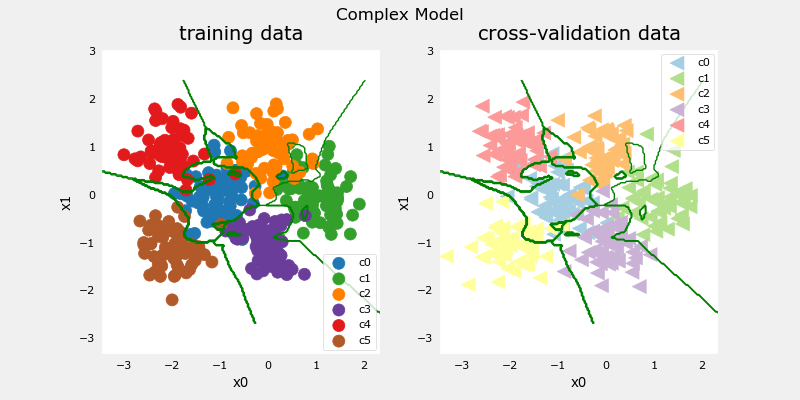

In [42]:
#make a model for plotting routines to call
model_predict = lambda Xl: np.argmax(tf.nn.softmax(model.predict(Xl)).numpy(),axis=1)
plt_nn(model_predict,X_train,y_train, classes, X_cv, y_cv, suptitle="Complex Model")

This model has worked very hard to capture outliers of each category. As a result, it has miscategorized some of the cross-validation data. Let's calculate the classification error.

In [43]:
training_cerr_complex = eval_cat_err(y_train, model_predict(X_train))
cv_cerr_complex = eval_cat_err(y_cv, model_predict(X_cv))
print(f"categorization error, training, complex model: {training_cerr_complex:0.3f}")
print(f"categorization error, cv,       complex model: {cv_cerr_complex:0.3f}")

categorization error, training, complex model: 0.003
categorization error, cv,       complex model: 0.119


<a name="5.1"></a>
### 5.1 Simple model
Now, let's try a simple model

<a name="ex04"></a>
### Exercise 4

Below, compose a two-layer model:
* Dense layer with 6 units, relu activation
* Dense layer with 6 units and a linear activation. 
Compile using
* loss with `SparseCategoricalCrossentropy`, remember to use  `from_logits=True`
* Adam optimizer with learning rate of 0.01.

In [44]:
# UNQ_C4
# GRADED CELL: model_s

tf.random.set_seed(1234)
model_s = Sequential(
    [
        ### START CODE HERE ### 
        Dense(units = 6, activation = 'relu'),
        Dense(units = 6, activation = 'linear'),
        ### END CODE HERE ### 
    ], name = "Simple"
)
model_s.compile(
    ### START CODE HERE ### 
    loss=SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-2),
    ### START CODE HERE ### 
)


In [45]:
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)

# BEGIN UNIT TEST
model_s.fit(
    X_train,y_train,
    epochs=1000
)
# END UNIT TEST

Epoch 1/1000
13/13 [==============================] - 0s 468us/step - loss: 1.8120
Epoch 2/1000
13/13 [==============================] - 0s 522us/step - loss: 1.4870
Epoch 3/1000
13/13 [==============================] - 0s 483us/step - loss: 1.2889
Epoch 4/1000
13/13 [==============================] - 0s 474us/step - loss: 1.1819
Epoch 5/1000
13/13 [==============================] - 0s 528us/step - loss: 1.0045
Epoch 6/1000
13/13 [==============================] - 0s 482us/step - loss: 0.8534
Epoch 7/1000
13/13 [==============================] - 0s 479us/step - loss: 0.6773
Epoch 8/1000
13/13 [==============================] - 0s 431us/step - loss: 0.5528
Epoch 9/1000
13/13 [==============================] - 0s 401us/step - loss: 0.4697
Epoch 10/1000
13/13 [==============================] - 0s 384us/step - loss: 0.4053
Epoch 11/1000
13/13 [==============================] - 0s 404us/step - loss: 0.3760
Epoch 12/1000
13/13 [==============================] - 0s 394us/step - loss: 0.3611
E

13/13 [==============================] - 0s 394us/step - loss: 0.1795
Epoch 99/1000
13/13 [==============================] - 0s 409us/step - loss: 0.1863
Epoch 100/1000
13/13 [==============================] - 0s 364us/step - loss: 0.1970
Epoch 101/1000
13/13 [==============================] - 0s 381us/step - loss: 0.1836
Epoch 102/1000
13/13 [==============================] - 0s 372us/step - loss: 0.2026
Epoch 103/1000
13/13 [==============================] - 0s 362us/step - loss: 0.1688
Epoch 104/1000
13/13 [==============================] - 0s 361us/step - loss: 0.2010
Epoch 105/1000
13/13 [==============================] - 0s 391us/step - loss: 0.1848
Epoch 106/1000
13/13 [==============================] - 0s 344us/step - loss: 0.1879
Epoch 107/1000
13/13 [==============================] - 0s 365us/step - loss: 0.1867
Epoch 108/1000
13/13 [==============================] - 0s 358us/step - loss: 0.1619
Epoch 109/1000
13/13 [==============================] - 0s 368us/step - loss: 0.2

13/13 [==============================] - 0s 380us/step - loss: 0.1767
Epoch 195/1000
13/13 [==============================] - 0s 348us/step - loss: 0.2290
Epoch 196/1000
13/13 [==============================] - 0s 357us/step - loss: 0.1891
Epoch 197/1000
13/13 [==============================] - 0s 382us/step - loss: 0.1742
Epoch 198/1000
13/13 [==============================] - 0s 378us/step - loss: 0.1735
Epoch 199/1000
13/13 [==============================] - 0s 405us/step - loss: 0.1952
Epoch 200/1000
13/13 [==============================] - 0s 337us/step - loss: 0.1793
Epoch 201/1000
13/13 [==============================] - 0s 369us/step - loss: 0.1786
Epoch 202/1000
13/13 [==============================] - 0s 351us/step - loss: 0.1998
Epoch 203/1000
13/13 [==============================] - 0s 354us/step - loss: 0.1693
Epoch 204/1000
13/13 [==============================] - 0s 401us/step - loss: 0.2042
Epoch 205/1000
13/13 [==============================] - 0s 370us/step - loss: 0.

13/13 [==============================] - 0s 425us/step - loss: 0.1761
Epoch 291/1000
13/13 [==============================] - 0s 377us/step - loss: 0.1810
Epoch 292/1000
13/13 [==============================] - 0s 388us/step - loss: 0.2131
Epoch 293/1000
13/13 [==============================] - 0s 375us/step - loss: 0.1813
Epoch 294/1000
13/13 [==============================] - 0s 357us/step - loss: 0.1393
Epoch 295/1000
13/13 [==============================] - 0s 354us/step - loss: 0.2201
Epoch 296/1000
13/13 [==============================] - 0s 372us/step - loss: 0.1587
Epoch 297/1000
13/13 [==============================] - 0s 321us/step - loss: 0.1732
Epoch 298/1000
13/13 [==============================] - 0s 358us/step - loss: 0.1719
Epoch 299/1000
13/13 [==============================] - 0s 363us/step - loss: 0.1682
Epoch 300/1000
13/13 [==============================] - 0s 337us/step - loss: 0.1673
Epoch 301/1000
13/13 [==============================] - 0s 388us/step - loss: 0.

13/13 [==============================] - 0s 362us/step - loss: 0.1785
Epoch 387/1000
13/13 [==============================] - 0s 394us/step - loss: 0.1800
Epoch 388/1000
13/13 [==============================] - 0s 339us/step - loss: 0.1706
Epoch 389/1000
13/13 [==============================] - 0s 349us/step - loss: 0.1608
Epoch 390/1000
13/13 [==============================] - 0s 377us/step - loss: 0.1594
Epoch 391/1000
13/13 [==============================] - 0s 361us/step - loss: 0.1671
Epoch 392/1000
13/13 [==============================] - 0s 356us/step - loss: 0.1950
Epoch 393/1000
13/13 [==============================] - 0s 361us/step - loss: 0.1913
Epoch 394/1000
13/13 [==============================] - 0s 356us/step - loss: 0.1863
Epoch 395/1000
13/13 [==============================] - 0s 342us/step - loss: 0.1785
Epoch 396/1000
13/13 [==============================] - 0s 358us/step - loss: 0.2313
Epoch 397/1000
13/13 [==============================] - 0s 366us/step - loss: 0.

13/13 [==============================] - 0s 376us/step - loss: 0.1900
Epoch 483/1000
13/13 [==============================] - 0s 362us/step - loss: 0.1661
Epoch 484/1000
13/13 [==============================] - 0s 365us/step - loss: 0.1558
Epoch 485/1000
13/13 [==============================] - 0s 360us/step - loss: 0.1587
Epoch 486/1000
13/13 [==============================] - 0s 359us/step - loss: 0.1656
Epoch 487/1000
13/13 [==============================] - 0s 374us/step - loss: 0.1613
Epoch 488/1000
13/13 [==============================] - 0s 384us/step - loss: 0.1603
Epoch 489/1000
13/13 [==============================] - 0s 369us/step - loss: 0.1723
Epoch 490/1000
13/13 [==============================] - 0s 358us/step - loss: 0.1830
Epoch 491/1000
13/13 [==============================] - 0s 367us/step - loss: 0.2012
Epoch 492/1000
13/13 [==============================] - 0s 366us/step - loss: 0.2327
Epoch 493/1000
13/13 [==============================] - 0s 343us/step - loss: 0.

13/13 [==============================] - 0s 338us/step - loss: 0.2028
Epoch 579/1000
13/13 [==============================] - 0s 357us/step - loss: 0.1752
Epoch 580/1000
13/13 [==============================] - 0s 359us/step - loss: 0.1865
Epoch 581/1000
13/13 [==============================] - 0s 379us/step - loss: 0.1943
Epoch 582/1000
13/13 [==============================] - 0s 325us/step - loss: 0.1635
Epoch 583/1000
13/13 [==============================] - 0s 320us/step - loss: 0.2166
Epoch 584/1000
13/13 [==============================] - 0s 359us/step - loss: 0.1804
Epoch 585/1000
13/13 [==============================] - 0s 361us/step - loss: 0.1502
Epoch 586/1000
13/13 [==============================] - 0s 371us/step - loss: 0.1767
Epoch 587/1000
13/13 [==============================] - 0s 355us/step - loss: 0.1895
Epoch 588/1000
13/13 [==============================] - 0s 357us/step - loss: 0.1843
Epoch 589/1000
13/13 [==============================] - 0s 335us/step - loss: 0.

13/13 [==============================] - 0s 371us/step - loss: 0.1651
Epoch 675/1000
13/13 [==============================] - 0s 374us/step - loss: 0.1542
Epoch 676/1000
13/13 [==============================] - 0s 359us/step - loss: 0.1878
Epoch 677/1000
13/13 [==============================] - 0s 370us/step - loss: 0.1473
Epoch 678/1000
13/13 [==============================] - 0s 389us/step - loss: 0.1885
Epoch 679/1000
13/13 [==============================] - 0s 357us/step - loss: 0.1677
Epoch 680/1000
13/13 [==============================] - 0s 328us/step - loss: 0.1531
Epoch 681/1000
13/13 [==============================] - 0s 384us/step - loss: 0.1415
Epoch 682/1000
13/13 [==============================] - 0s 321us/step - loss: 0.1443
Epoch 683/1000
13/13 [==============================] - 0s 344us/step - loss: 0.1520
Epoch 684/1000
13/13 [==============================] - 0s 340us/step - loss: 0.1482
Epoch 685/1000
13/13 [==============================] - 0s 355us/step - loss: 0.

13/13 [==============================] - 0s 357us/step - loss: 0.1497
Epoch 771/1000
13/13 [==============================] - 0s 367us/step - loss: 0.1482
Epoch 772/1000
13/13 [==============================] - 0s 376us/step - loss: 0.2053
Epoch 773/1000
13/13 [==============================] - 0s 358us/step - loss: 0.1637
Epoch 774/1000
13/13 [==============================] - 0s 371us/step - loss: 0.1680
Epoch 775/1000
13/13 [==============================] - 0s 352us/step - loss: 0.1731
Epoch 776/1000
13/13 [==============================] - 0s 368us/step - loss: 0.1527
Epoch 777/1000
13/13 [==============================] - 0s 373us/step - loss: 0.1827
Epoch 778/1000
13/13 [==============================] - 0s 367us/step - loss: 0.2130
Epoch 779/1000
13/13 [==============================] - 0s 362us/step - loss: 0.1473
Epoch 780/1000
13/13 [==============================] - 0s 369us/step - loss: 0.1435
Epoch 781/1000
13/13 [==============================] - 0s 335us/step - loss: 0.

13/13 [==============================] - 0s 377us/step - loss: 0.1803
Epoch 867/1000
13/13 [==============================] - 0s 325us/step - loss: 0.1983
Epoch 868/1000
13/13 [==============================] - 0s 361us/step - loss: 0.2050
Epoch 869/1000
13/13 [==============================] - 0s 374us/step - loss: 0.1602
Epoch 870/1000
13/13 [==============================] - 0s 337us/step - loss: 0.1527
Epoch 871/1000
13/13 [==============================] - 0s 353us/step - loss: 0.1590
Epoch 872/1000
13/13 [==============================] - 0s 397us/step - loss: 0.1929
Epoch 873/1000
13/13 [==============================] - 0s 325us/step - loss: 0.1641
Epoch 874/1000
13/13 [==============================] - 0s 351us/step - loss: 0.1632
Epoch 875/1000
13/13 [==============================] - 0s 354us/step - loss: 0.1452
Epoch 876/1000
13/13 [==============================] - 0s 358us/step - loss: 0.1456
Epoch 877/1000
13/13 [==============================] - 0s 374us/step - loss: 0.

13/13 [==============================] - 0s 378us/step - loss: 0.1498
Epoch 963/1000
13/13 [==============================] - 0s 367us/step - loss: 0.1694
Epoch 964/1000
13/13 [==============================] - 0s 361us/step - loss: 0.1421
Epoch 965/1000
13/13 [==============================] - 0s 373us/step - loss: 0.1964
Epoch 966/1000
13/13 [==============================] - 0s 348us/step - loss: 0.1716
Epoch 967/1000
13/13 [==============================] - 0s 367us/step - loss: 0.1958
Epoch 968/1000
13/13 [==============================] - 0s 370us/step - loss: 0.1466
Epoch 969/1000
13/13 [==============================] - 0s 334us/step - loss: 0.1855
Epoch 970/1000
13/13 [==============================] - 0s 367us/step - loss: 0.1819
Epoch 971/1000
13/13 [==============================] - 0s 342us/step - loss: 0.1282
Epoch 972/1000
13/13 [==============================] - 0s 359us/step - loss: 0.1796
Epoch 973/1000
13/13 [==============================] - 0s 368us/step - loss: 0.

In [46]:
# BEGIN UNIT TEST
model_s.summary()

model_s_test(model_s, classes, X_train.shape[1])
# END UNIT TEST

Model: "Simple"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 6)                 18        
_________________________________________________________________
dense_9 (Dense)              (None, 6)                 42        
Total params: 60
Trainable params: 60
Non-trainable params: 0
_________________________________________________________________
All tests passed!


<details>
  <summary><font size="3" color="darkgreen"><b>Click for hints</b></font></summary>
    
Summary should match this (layer instance names may increment )
```
Model: "Simple"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
L1 (Dense)                   (None, 6)                 18        
_________________________________________________________________
L2 (Dense)                   (None, 6)                 42        
=================================================================
Total params: 60
Trainable params: 60
Non-trainable params: 0
_________________________________________________________________
```
  <details>
  <summary><font size="3" color="darkgreen"><b>Click for more hints</b></font></summary>
  
```python
tf.random.set_seed(1234)
model_s = Sequential(
    [
        Dense(6, activation = 'relu', name="L1"),            # @REPLACE
        Dense(classes, activation = 'linear', name="L2")     # @REPLACE
    ], name = "Simple"
)
model_s.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),     # @REPLACE
    optimizer=tf.keras.optimizers.Adam(0.01),     # @REPLACE
)

model_s.fit(
    X_train,y_train,
    epochs=1000
)                                   
``` 

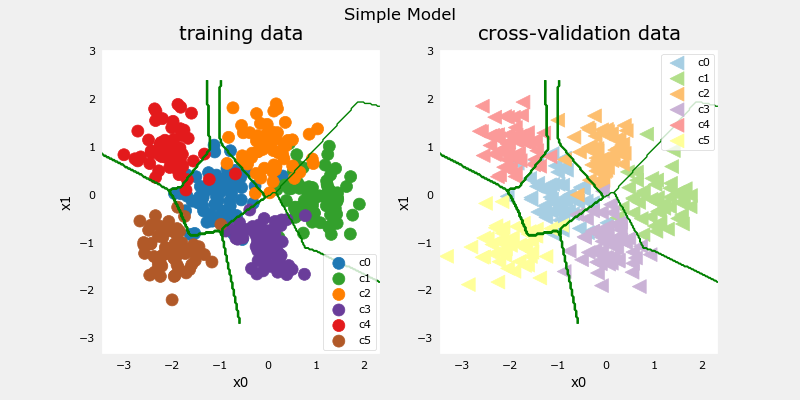

In [47]:
#make a model for plotting routines to call
model_predict_s = lambda Xl: np.argmax(tf.nn.softmax(model_s.predict(Xl)).numpy(),axis=1)
plt_nn(model_predict_s,X_train,y_train, classes, X_cv, y_cv, suptitle="Simple Model")

This simple models does pretty well. Let's calculate the classification error.

In [48]:
training_cerr_simple = eval_cat_err(y_train, model_predict_s(X_train))
cv_cerr_simple = eval_cat_err(y_cv, model_predict_s(X_cv))
print(f"categorization error, training, simple model, {training_cerr_simple:0.3f}, complex model: {training_cerr_complex:0.3f}" )
print(f"categorization error, cv,       simple model, {cv_cerr_simple:0.3f}, complex model: {cv_cerr_complex:0.3f}" )

categorization error, training, simple model, 0.062, complex model: 0.003
categorization error, cv,       simple model, 0.087, complex model: 0.119


Our simple model has a little higher classification error on training data but does better on cross-validation data than the more complex model.

<a name="6"></a>
## 6 - Regularization
As in the case of polynomial regression, one can apply regularization to moderate the impact of a more complex model. Let's try this below.

<a name="ex05"></a>
### Exercise 5

Reconstruct your complex model, but this time include regularization.
Below, compose a three-layer model:
* Dense layer with 120 units, relu activation, `kernel_regularizer=tf.keras.regularizers.l2(0.1)`
* Dense layer with 40 units, relu activation, `kernel_regularizer=tf.keras.regularizers.l2(0.1)`
* Dense layer with 6 units and a linear activation. 
Compile using
* loss with `SparseCategoricalCrossentropy`, remember to use  `from_logits=True`
* Adam optimizer with learning rate of 0.01.

In [49]:
# UNQ_C5
# GRADED CELL: model_r

tf.random.set_seed(1234)
model_r = Sequential(
    [
        ### START CODE HERE ### 
        Dense(units = 120, activation = 'relu',kernel_regularizer=tf.keras.regularizers.l2(0.1)),
        Dense(units = 40,  activation = 'relu',kernel_regularizer=tf.keras.regularizers.l2(0.1)),
        Dense(units = 6,  activation = 'linear')
        ### START CODE HERE ### 
    ], name= None
)
model_r.compile(
    ### START CODE HERE ### 
    loss=SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-2),
    ### START CODE HERE ### 
)


In [50]:
# BEGIN UNIT TEST
model_r.fit(
    X_train, y_train,
    epochs=1000
)
# END UNIT TEST

Epoch 1/1000
13/13 [==============================] - 0s 573us/step - loss: 5.8501
Epoch 2/1000
13/13 [==============================] - 0s 658us/step - loss: 1.8165
Epoch 3/1000
13/13 [==============================] - 0s 607us/step - loss: 1.3945
Epoch 4/1000
13/13 [==============================] - 0s 686us/step - loss: 1.1554
Epoch 5/1000
13/13 [==============================] - 0s 611us/step - loss: 1.0094
Epoch 6/1000
13/13 [==============================] - 0s 671us/step - loss: 1.0342
Epoch 7/1000
13/13 [==============================] - 0s 564us/step - loss: 0.9784
Epoch 8/1000
13/13 [==============================] - 0s 641us/step - loss: 0.9150
Epoch 9/1000
13/13 [==============================] - 0s 611us/step - loss: 0.8168
Epoch 10/1000
13/13 [==============================] - 0s 601us/step - loss: 0.7619
Epoch 11/1000
13/13 [==============================] - 0s 562us/step - loss: 0.7462
Epoch 12/1000
13/13 [==============================] - 0s 585us/step - loss: 0.7307
E

13/13 [==============================] - 0s 626us/step - loss: 0.4444
Epoch 99/1000
13/13 [==============================] - 0s 600us/step - loss: 0.4722
Epoch 100/1000
13/13 [==============================] - 0s 588us/step - loss: 0.4915
Epoch 101/1000
13/13 [==============================] - 0s 622us/step - loss: 0.4634
Epoch 102/1000
13/13 [==============================] - 0s 601us/step - loss: 0.4775
Epoch 103/1000
13/13 [==============================] - 0s 589us/step - loss: 0.4391
Epoch 104/1000
13/13 [==============================] - 0s 589us/step - loss: 0.4613
Epoch 105/1000
13/13 [==============================] - 0s 575us/step - loss: 0.4871
Epoch 106/1000
13/13 [==============================] - 0s 618us/step - loss: 0.4650
Epoch 107/1000
13/13 [==============================] - 0s 592us/step - loss: 0.4469
Epoch 108/1000
13/13 [==============================] - 0s 619us/step - loss: 0.4539
Epoch 109/1000
13/13 [==============================] - 0s 606us/step - loss: 0.4

13/13 [==============================] - 0s 589us/step - loss: 0.4031
Epoch 195/1000
13/13 [==============================] - 0s 599us/step - loss: 0.4393
Epoch 196/1000
13/13 [==============================] - 0s 594us/step - loss: 0.4025
Epoch 197/1000
13/13 [==============================] - 0s 587us/step - loss: 0.4071
Epoch 198/1000
13/13 [==============================] - 0s 584us/step - loss: 0.3818
Epoch 199/1000
13/13 [==============================] - 0s 592us/step - loss: 0.4046
Epoch 200/1000
13/13 [==============================] - 0s 595us/step - loss: 0.3933
Epoch 201/1000
13/13 [==============================] - 0s 638us/step - loss: 0.4326
Epoch 202/1000
13/13 [==============================] - 0s 609us/step - loss: 0.4166
Epoch 203/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3744
Epoch 204/1000
13/13 [==============================] - 0s 592us/step - loss: 0.4141
Epoch 205/1000
13/13 [==============================] - 0s 603us/step - loss: 0.

13/13 [==============================] - 0s 714us/step - loss: 0.3883
Epoch 291/1000
13/13 [==============================] - 0s 612us/step - loss: 0.3937
Epoch 292/1000
13/13 [==============================] - 0s 593us/step - loss: 0.4003
Epoch 293/1000
13/13 [==============================] - 0s 549us/step - loss: 0.3670
Epoch 294/1000
13/13 [==============================] - 0s 585us/step - loss: 0.3668
Epoch 295/1000
13/13 [==============================] - 0s 596us/step - loss: 0.4494
Epoch 296/1000
13/13 [==============================] - 0s 577us/step - loss: 0.3535
Epoch 297/1000
13/13 [==============================] - 0s 595us/step - loss: 0.3584
Epoch 298/1000
13/13 [==============================] - 0s 593us/step - loss: 0.3783
Epoch 299/1000
13/13 [==============================] - 0s 605us/step - loss: 0.3726
Epoch 300/1000
13/13 [==============================] - 0s 574us/step - loss: 0.4110
Epoch 301/1000
13/13 [==============================] - 0s 575us/step - loss: 0.

13/13 [==============================] - 0s 560us/step - loss: 0.3569
Epoch 387/1000
13/13 [==============================] - 0s 581us/step - loss: 0.3648
Epoch 388/1000
13/13 [==============================] - 0s 588us/step - loss: 0.3721
Epoch 389/1000
13/13 [==============================] - 0s 566us/step - loss: 0.3395
Epoch 390/1000
13/13 [==============================] - 0s 562us/step - loss: 0.3322
Epoch 391/1000
13/13 [==============================] - 0s 588us/step - loss: 0.3483
Epoch 392/1000
13/13 [==============================] - 0s 574us/step - loss: 0.3831
Epoch 393/1000
13/13 [==============================] - 0s 582us/step - loss: 0.3736
Epoch 394/1000
13/13 [==============================] - 0s 590us/step - loss: 0.3668
Epoch 395/1000
13/13 [==============================] - 0s 588us/step - loss: 0.3830
Epoch 396/1000
13/13 [==============================] - 0s 570us/step - loss: 0.4213
Epoch 397/1000
13/13 [==============================] - 0s 567us/step - loss: 0.

13/13 [==============================] - 0s 584us/step - loss: 0.3853
Epoch 483/1000
13/13 [==============================] - 0s 599us/step - loss: 0.3803
Epoch 484/1000
13/13 [==============================] - 0s 590us/step - loss: 0.3609
Epoch 485/1000
13/13 [==============================] - 0s 587us/step - loss: 0.3804
Epoch 486/1000
13/13 [==============================] - 0s 571us/step - loss: 0.3503
Epoch 487/1000
13/13 [==============================] - 0s 585us/step - loss: 0.3367
Epoch 488/1000
13/13 [==============================] - 0s 610us/step - loss: 0.3382
Epoch 489/1000
13/13 [==============================] - 0s 589us/step - loss: 0.3337
Epoch 490/1000
13/13 [==============================] - 0s 600us/step - loss: 0.3697
Epoch 491/1000
13/13 [==============================] - 0s 600us/step - loss: 0.3834
Epoch 492/1000
13/13 [==============================] - 0s 587us/step - loss: 0.4076
Epoch 493/1000
13/13 [==============================] - 0s 592us/step - loss: 0.

13/13 [==============================] - 0s 596us/step - loss: 0.4526
Epoch 579/1000
13/13 [==============================] - 0s 584us/step - loss: 0.3659
Epoch 580/1000
13/13 [==============================] - 0s 560us/step - loss: 0.3526
Epoch 581/1000
13/13 [==============================] - 0s 579us/step - loss: 0.3726
Epoch 582/1000
13/13 [==============================] - 0s 569us/step - loss: 0.3584
Epoch 583/1000
13/13 [==============================] - 0s 581us/step - loss: 0.3894
Epoch 584/1000
13/13 [==============================] - 0s 631us/step - loss: 0.3719
Epoch 585/1000
13/13 [==============================] - 0s 596us/step - loss: 0.3569
Epoch 586/1000
13/13 [==============================] - 0s 558us/step - loss: 0.3822
Epoch 587/1000
13/13 [==============================] - 0s 590us/step - loss: 0.3739
Epoch 588/1000
13/13 [==============================] - 0s 598us/step - loss: 0.3490
Epoch 589/1000
13/13 [==============================] - 0s 581us/step - loss: 0.

13/13 [==============================] - 0s 595us/step - loss: 0.4088
Epoch 675/1000
13/13 [==============================] - 0s 579us/step - loss: 0.3234
Epoch 676/1000
13/13 [==============================] - 0s 588us/step - loss: 0.3707
Epoch 677/1000
13/13 [==============================] - 0s 596us/step - loss: 0.3159
Epoch 678/1000
13/13 [==============================] - 0s 594us/step - loss: 0.3469
Epoch 679/1000
13/13 [==============================] - 0s 630us/step - loss: 0.3348
Epoch 680/1000
13/13 [==============================] - 0s 586us/step - loss: 0.3315
Epoch 681/1000
13/13 [==============================] - 0s 579us/step - loss: 0.3286
Epoch 682/1000
13/13 [==============================] - 0s 584us/step - loss: 0.3117
Epoch 683/1000
13/13 [==============================] - 0s 588us/step - loss: 0.3030
Epoch 684/1000
13/13 [==============================] - 0s 586us/step - loss: 0.3142
Epoch 685/1000
13/13 [==============================] - 0s 581us/step - loss: 0.

13/13 [==============================] - 0s 568us/step - loss: 0.3148
Epoch 771/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3294
Epoch 772/1000
13/13 [==============================] - 0s 566us/step - loss: 0.3768
Epoch 773/1000
13/13 [==============================] - 0s 570us/step - loss: 0.3632
Epoch 774/1000
13/13 [==============================] - 0s 580us/step - loss: 0.3564
Epoch 775/1000
13/13 [==============================] - 0s 600us/step - loss: 0.3427
Epoch 776/1000
13/13 [==============================] - 0s 589us/step - loss: 0.3977
Epoch 777/1000
13/13 [==============================] - 0s 591us/step - loss: 0.4132
Epoch 778/1000
13/13 [==============================] - 0s 586us/step - loss: 0.3654
Epoch 779/1000
13/13 [==============================] - 0s 612us/step - loss: 0.3112
Epoch 780/1000
13/13 [==============================] - 0s 603us/step - loss: 0.3034
Epoch 781/1000
13/13 [==============================] - 0s 552us/step - loss: 0.34

13/13 [==============================] - 0s 567us/step - loss: 0.3383
Epoch 867/1000
13/13 [==============================] - 0s 597us/step - loss: 0.3761
Epoch 868/1000
13/13 [==============================] - 0s 558us/step - loss: 0.3832
Epoch 869/1000
13/13 [==============================] - 0s 564us/step - loss: 0.3542
Epoch 870/1000
13/13 [==============================] - 0s 588us/step - loss: 0.3355
Epoch 871/1000
13/13 [==============================] - 0s 596us/step - loss: 0.3605
Epoch 872/1000
13/13 [==============================] - 0s 572us/step - loss: 0.3691
Epoch 873/1000
13/13 [==============================] - 0s 579us/step - loss: 0.3232
Epoch 874/1000
13/13 [==============================] - 0s 574us/step - loss: 0.3366
Epoch 875/1000
13/13 [==============================] - 0s 590us/step - loss: 0.3184
Epoch 876/1000
13/13 [==============================] - 0s 579us/step - loss: 0.3182
Epoch 877/1000
13/13 [==============================] - 0s 575us/step - loss: 0.

13/13 [==============================] - 0s 586us/step - loss: 0.3052
Epoch 963/1000
13/13 [==============================] - 0s 569us/step - loss: 0.3406
Epoch 964/1000
13/13 [==============================] - 0s 589us/step - loss: 0.2886
Epoch 965/1000
13/13 [==============================] - 0s 585us/step - loss: 0.3341
Epoch 966/1000
13/13 [==============================] - 0s 602us/step - loss: 0.3330
Epoch 967/1000
13/13 [==============================] - 0s 590us/step - loss: 0.3427
Epoch 968/1000
13/13 [==============================] - 0s 595us/step - loss: 0.3067
Epoch 969/1000
13/13 [==============================] - 0s 577us/step - loss: 0.3839
Epoch 970/1000
13/13 [==============================] - 0s 584us/step - loss: 0.3573
Epoch 971/1000
13/13 [==============================] - 0s 581us/step - loss: 0.3166
Epoch 972/1000
13/13 [==============================] - 0s 582us/step - loss: 0.3374
Epoch 973/1000
13/13 [==============================] - 0s 587us/step - loss: 0.

In [51]:
# BEGIN UNIT TEST
model_r.summary()

model_r_test(model_r, classes, X_train.shape[1]) 
# END UNIT TEST

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 120)               360       
_________________________________________________________________
dense_11 (Dense)             (None, 40)                4840      
_________________________________________________________________
dense_12 (Dense)             (None, 6)                 246       
Total params: 5,446
Trainable params: 5,446
Non-trainable params: 0
_________________________________________________________________
ddd
All tests passed!


<details>
  <summary><font size="3" color="darkgreen"><b>Click for hints</b></font></summary>
    
Summary should match this (layer instance names may increment )
```
Model: "ComplexRegularized"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
L1 (Dense)                   (None, 120)               360       
_________________________________________________________________
L2 (Dense)                   (None, 40)                4840      
_________________________________________________________________
L3 (Dense)                   (None, 6)                 246       
=================================================================
Total params: 5,446
Trainable params: 5,446
Non-trainable params: 0
_________________________________________________________________
```
  <details>
  <summary><font size="3" color="darkgreen"><b>Click for more hints</b></font></summary>
  
```python
tf.random.set_seed(1234)
model_r = Sequential(
    [
        Dense(120, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(0.1), name="L1"), 
        Dense(40, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(0.1), name="L2"),  
        Dense(classes, activation = 'linear', name="L3")  
    ], name="ComplexRegularized"
)
model_r.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
    optimizer=tf.keras.optimizers.Adam(0.01),                             
)

model_r.fit(
    X_train,y_train,
    epochs=1000
)                                   
``` 

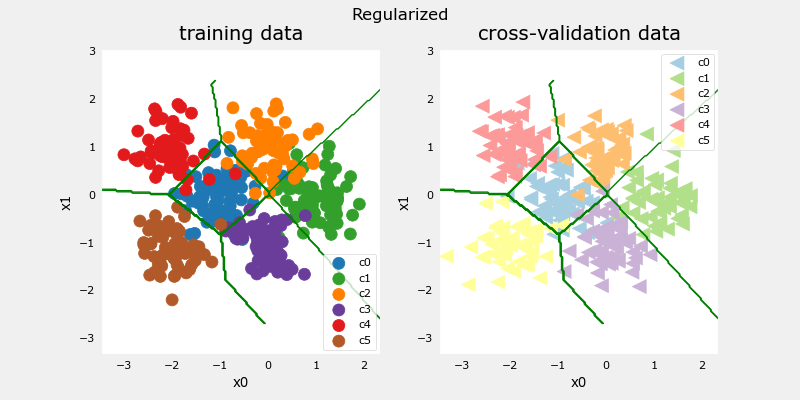

In [52]:
#make a model for plotting routines to call
model_predict_r = lambda Xl: np.argmax(tf.nn.softmax(model_r.predict(Xl)).numpy(),axis=1)
 
plt_nn(model_predict_r, X_train,y_train, classes, X_cv, y_cv, suptitle="Regularized")

The results look very similar to the 'ideal' model. Let's check classification error.

In [53]:
training_cerr_reg = eval_cat_err(y_train, model_predict_r(X_train))
cv_cerr_reg = eval_cat_err(y_cv, model_predict_r(X_cv))
test_cerr_reg = eval_cat_err(y_test, model_predict_r(X_test))
print(f"categorization error, training, regularized: {training_cerr_reg:0.3f}, simple model, {training_cerr_simple:0.3f}, complex model: {training_cerr_complex:0.3f}" )
print(f"categorization error, cv,       regularized: {cv_cerr_reg:0.3f}, simple model, {cv_cerr_simple:0.3f}, complex model: {cv_cerr_complex:0.3f}" )

categorization error, training, regularized: 0.072, simple model, 0.062, complex model: 0.003
categorization error, cv,       regularized: 0.066, simple model, 0.087, complex model: 0.119


The simple model is a bit better in the training set than the regularized model but it worse in the cross validation set.

<a name="7"></a>
## 7 - Iterate to find optimal regularization value
As you did in linear regression, you can try many regularization values. This code takes several minutes to run. If you have time, you can run it and check the results. If not, you have completed the graded parts of the assignment!

In [54]:
tf.random.set_seed(1234)
lambdas = [0.0, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3]
models=[None] * len(lambdas)
for i in range(len(lambdas)):
    lambda_ = lambdas[i]
    models[i] =  Sequential(
        [
            Dense(120, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
            Dense(40, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
            Dense(classes, activation = 'linear')
        ]
    )
    models[i].compile(
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        optimizer=tf.keras.optimizers.Adam(0.01),
    )

    models[i].fit(
        X_train,y_train,
        epochs=1000
    )
    print(f"Finished lambda = {lambda_}")


Epoch 1/1000
13/13 [==============================] - 0s 538us/step - loss: 1.3722
Epoch 2/1000
13/13 [==============================] - 0s 602us/step - loss: 0.4811
Epoch 3/1000
13/13 [==============================] - 0s 592us/step - loss: 0.3044
Epoch 4/1000
13/13 [==============================] - 0s 584us/step - loss: 0.2920
Epoch 5/1000
13/13 [==============================] - 0s 562us/step - loss: 0.2640
Epoch 6/1000
13/13 [==============================] - 0s 615us/step - loss: 0.3146
Epoch 7/1000
13/13 [==============================] - 0s 538us/step - loss: 0.2224
Epoch 8/1000
13/13 [==============================] - 0s 617us/step - loss: 0.2455
Epoch 9/1000
13/13 [==============================] - 0s 609us/step - loss: 0.2534
Epoch 10/1000
13/13 [==============================] - 0s 620us/step - loss: 0.1958
Epoch 11/1000
13/13 [==============================] - 0s 603us/step - loss: 0.1839
Epoch 12/1000
13/13 [==============================] - 0s 607us/step - loss: 0.1891
E

13/13 [==============================] - 0s 594us/step - loss: 0.1530
Epoch 99/1000
13/13 [==============================] - 0s 585us/step - loss: 0.1558
Epoch 100/1000
13/13 [==============================] - 0s 595us/step - loss: 0.1461
Epoch 101/1000
13/13 [==============================] - 0s 564us/step - loss: 0.1437
Epoch 102/1000
13/13 [==============================] - 0s 592us/step - loss: 0.1447
Epoch 103/1000
13/13 [==============================] - 0s 586us/step - loss: 0.1392
Epoch 104/1000
13/13 [==============================] - 0s 553us/step - loss: 0.1712
Epoch 105/1000
13/13 [==============================] - 0s 583us/step - loss: 0.1318
Epoch 106/1000
13/13 [==============================] - 0s 571us/step - loss: 0.1454
Epoch 107/1000
13/13 [==============================] - 0s 569us/step - loss: 0.1534
Epoch 108/1000
13/13 [==============================] - 0s 572us/step - loss: 0.1202
Epoch 109/1000
13/13 [==============================] - 0s 564us/step - loss: 0.1

13/13 [==============================] - 0s 553us/step - loss: 0.0896
Epoch 195/1000
13/13 [==============================] - 0s 604us/step - loss: 0.0921
Epoch 196/1000
13/13 [==============================] - 0s 590us/step - loss: 0.1035
Epoch 197/1000
13/13 [==============================] - 0s 558us/step - loss: 0.0805
Epoch 198/1000
13/13 [==============================] - 0s 582us/step - loss: 0.0951
Epoch 199/1000
13/13 [==============================] - 0s 591us/step - loss: 0.1144
Epoch 200/1000
13/13 [==============================] - 0s 576us/step - loss: 0.1285
Epoch 201/1000
13/13 [==============================] - 0s 582us/step - loss: 0.1131
Epoch 202/1000
13/13 [==============================] - 0s 580us/step - loss: 0.1072
Epoch 203/1000
13/13 [==============================] - 0s 593us/step - loss: 0.0721
Epoch 204/1000
13/13 [==============================] - 0s 576us/step - loss: 0.0933
Epoch 205/1000
13/13 [==============================] - 0s 542us/step - loss: 0.

13/13 [==============================] - 0s 586us/step - loss: 0.0733
Epoch 291/1000
13/13 [==============================] - 0s 555us/step - loss: 0.0592
Epoch 292/1000
13/13 [==============================] - 0s 564us/step - loss: 0.0942
Epoch 293/1000
13/13 [==============================] - 0s 583us/step - loss: 0.0783
Epoch 294/1000
13/13 [==============================] - 0s 587us/step - loss: 0.0474
Epoch 295/1000
13/13 [==============================] - 0s 582us/step - loss: 0.0763
Epoch 296/1000
13/13 [==============================] - 0s 559us/step - loss: 0.0807
Epoch 297/1000
13/13 [==============================] - 0s 556us/step - loss: 0.0758
Epoch 298/1000
13/13 [==============================] - 0s 558us/step - loss: 0.0816
Epoch 299/1000
13/13 [==============================] - 0s 579us/step - loss: 0.0830
Epoch 300/1000
13/13 [==============================] - 0s 560us/step - loss: 0.0574
Epoch 301/1000
13/13 [==============================] - 0s 584us/step - loss: 0.

13/13 [==============================] - 0s 537us/step - loss: 0.0628
Epoch 387/1000
13/13 [==============================] - 0s 597us/step - loss: 0.0684
Epoch 388/1000
13/13 [==============================] - 0s 612us/step - loss: 0.0867
Epoch 389/1000
13/13 [==============================] - 0s 599us/step - loss: 0.0583
Epoch 390/1000
13/13 [==============================] - 0s 604us/step - loss: 0.0558
Epoch 391/1000
13/13 [==============================] - 0s 618us/step - loss: 0.0654
Epoch 392/1000
13/13 [==============================] - 0s 607us/step - loss: 0.0674
Epoch 393/1000
13/13 [==============================] - 0s 583us/step - loss: 0.0684
Epoch 394/1000
13/13 [==============================] - 0s 615us/step - loss: 0.0693
Epoch 395/1000
13/13 [==============================] - 0s 584us/step - loss: 0.0577
Epoch 396/1000
13/13 [==============================] - 0s 591us/step - loss: 0.0900
Epoch 397/1000
13/13 [==============================] - 0s 575us/step - loss: 0.

13/13 [==============================] - 0s 578us/step - loss: 0.0531
Epoch 483/1000
13/13 [==============================] - 0s 598us/step - loss: 0.0386
Epoch 484/1000
13/13 [==============================] - 0s 590us/step - loss: 0.0285
Epoch 485/1000
13/13 [==============================] - 0s 612us/step - loss: 0.0326
Epoch 486/1000
13/13 [==============================] - 0s 594us/step - loss: 0.0405
Epoch 487/1000
13/13 [==============================] - 0s 586us/step - loss: 0.0284
Epoch 488/1000
13/13 [==============================] - 0s 585us/step - loss: 0.0345
Epoch 489/1000
13/13 [==============================] - 0s 592us/step - loss: 0.0415
Epoch 490/1000
13/13 [==============================] - 0s 572us/step - loss: 0.0485
Epoch 491/1000
13/13 [==============================] - 0s 576us/step - loss: 0.0353
Epoch 492/1000
13/13 [==============================] - 0s 586us/step - loss: 0.0390
Epoch 493/1000
13/13 [==============================] - 0s 582us/step - loss: 0.

13/13 [==============================] - 0s 624us/step - loss: 0.0274
Epoch 579/1000
13/13 [==============================] - 0s 577us/step - loss: 0.0249
Epoch 580/1000
13/13 [==============================] - 0s 607us/step - loss: 0.0485
Epoch 581/1000
13/13 [==============================] - 0s 576us/step - loss: 0.0560
Epoch 582/1000
13/13 [==============================] - 0s 567us/step - loss: 0.0905
Epoch 583/1000
13/13 [==============================] - 0s 564us/step - loss: 0.0486
Epoch 584/1000
13/13 [==============================] - 0s 592us/step - loss: 0.0648
Epoch 585/1000
13/13 [==============================] - 0s 578us/step - loss: 0.0803
Epoch 586/1000
13/13 [==============================] - 0s 552us/step - loss: 0.0895
Epoch 587/1000
13/13 [==============================] - 0s 553us/step - loss: 0.0636
Epoch 588/1000
13/13 [==============================] - 0s 593us/step - loss: 0.0269
Epoch 589/1000
13/13 [==============================] - 0s 589us/step - loss: 0.

13/13 [==============================] - 0s 899us/step - loss: 0.0299
Epoch 675/1000
13/13 [==============================] - 0s 727us/step - loss: 0.0510
Epoch 676/1000
13/13 [==============================] - 0s 594us/step - loss: 0.0394
Epoch 677/1000
13/13 [==============================] - 0s 606us/step - loss: 0.0565
Epoch 678/1000
13/13 [==============================] - 0s 582us/step - loss: 0.1602
Epoch 679/1000
13/13 [==============================] - 0s 561us/step - loss: 0.2467
Epoch 680/1000
13/13 [==============================] - 0s 553us/step - loss: 0.1411
Epoch 681/1000
13/13 [==============================] - 0s 570us/step - loss: 0.1322
Epoch 682/1000
13/13 [==============================] - 0s 551us/step - loss: 0.0776
Epoch 683/1000
13/13 [==============================] - 0s 578us/step - loss: 0.1086
Epoch 684/1000
13/13 [==============================] - 0s 563us/step - loss: 0.1819
Epoch 685/1000
13/13 [==============================] - 0s 524us/step - loss: 0.

13/13 [==============================] - 0s 572us/step - loss: 0.0462
Epoch 771/1000
13/13 [==============================] - 0s 598us/step - loss: 0.0331
Epoch 772/1000
13/13 [==============================] - 0s 562us/step - loss: 0.0404
Epoch 773/1000
13/13 [==============================] - 0s 563us/step - loss: 0.0387
Epoch 774/1000
13/13 [==============================] - 0s 587us/step - loss: 0.0341
Epoch 775/1000
13/13 [==============================] - 0s 578us/step - loss: 0.0462
Epoch 776/1000
13/13 [==============================] - 0s 567us/step - loss: 0.0527
Epoch 777/1000
13/13 [==============================] - 0s 589us/step - loss: 0.0895
Epoch 778/1000
13/13 [==============================] - 0s 578us/step - loss: 0.1084
Epoch 779/1000
13/13 [==============================] - 0s 574us/step - loss: 0.1693
Epoch 780/1000
13/13 [==============================] - 0s 580us/step - loss: 0.0972
Epoch 781/1000
13/13 [==============================] - 0s 574us/step - loss: 0.

13/13 [==============================] - 0s 565us/step - loss: 0.0115
Epoch 867/1000
13/13 [==============================] - 0s 579us/step - loss: 0.0147
Epoch 868/1000
13/13 [==============================] - 0s 582us/step - loss: 0.0280
Epoch 869/1000
13/13 [==============================] - 0s 587us/step - loss: 0.0144
Epoch 870/1000
13/13 [==============================] - 0s 596us/step - loss: 0.0323
Epoch 871/1000
13/13 [==============================] - 0s 590us/step - loss: 0.1590
Epoch 872/1000
13/13 [==============================] - 0s 561us/step - loss: 0.1097
Epoch 873/1000
13/13 [==============================] - 0s 588us/step - loss: 0.1924
Epoch 874/1000
13/13 [==============================] - 0s 560us/step - loss: 0.0445
Epoch 875/1000
13/13 [==============================] - 0s 576us/step - loss: 0.0505
Epoch 876/1000
13/13 [==============================] - 0s 573us/step - loss: 0.0845
Epoch 877/1000
13/13 [==============================] - 0s 579us/step - loss: 0.

13/13 [==============================] - 0s 583us/step - loss: 0.0431
Epoch 963/1000
13/13 [==============================] - 0s 568us/step - loss: 0.0319
Epoch 964/1000
13/13 [==============================] - 0s 584us/step - loss: 0.0469
Epoch 965/1000
13/13 [==============================] - 0s 572us/step - loss: 0.0504
Epoch 966/1000
13/13 [==============================] - 0s 586us/step - loss: 0.0393
Epoch 967/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.0436
Epoch 968/1000
13/13 [==============================] - 0s 579us/step - loss: 0.0401
Epoch 969/1000
13/13 [==============================] - 0s 562us/step - loss: 0.0520
Epoch 970/1000
13/13 [==============================] - 0s 569us/step - loss: 0.0408
Epoch 971/1000
13/13 [==============================] - 0s 569us/step - loss: 0.0358
Epoch 972/1000
13/13 [==============================] - 0s 561us/step - loss: 0.0215
Epoch 973/1000
13/13 [==============================] - 0s 584us/step - loss: 0.01

13/13 [==============================] - 0s 586us/step - loss: 0.2239
Epoch 60/1000
13/13 [==============================] - 0s 584us/step - loss: 0.2656
Epoch 61/1000
13/13 [==============================] - 0s 598us/step - loss: 0.2113
Epoch 62/1000
13/13 [==============================] - 0s 561us/step - loss: 0.2296
Epoch 63/1000
13/13 [==============================] - 0s 552us/step - loss: 0.2114
Epoch 64/1000
13/13 [==============================] - 0s 557us/step - loss: 0.2322
Epoch 65/1000
13/13 [==============================] - 0s 558us/step - loss: 0.2657
Epoch 66/1000
13/13 [==============================] - 0s 554us/step - loss: 0.2304
Epoch 67/1000
13/13 [==============================] - 0s 557us/step - loss: 0.2598
Epoch 68/1000
13/13 [==============================] - 0s 568us/step - loss: 0.3223
Epoch 69/1000
13/13 [==============================] - 0s 566us/step - loss: 0.2316
Epoch 70/1000
13/13 [==============================] - 0s 571us/step - loss: 0.2272
Epoch 

13/13 [==============================] - 0s 601us/step - loss: 0.1649
Epoch 157/1000
13/13 [==============================] - 0s 602us/step - loss: 0.2123
Epoch 158/1000
13/13 [==============================] - 0s 586us/step - loss: 0.1910
Epoch 159/1000
13/13 [==============================] - 0s 572us/step - loss: 0.2049
Epoch 160/1000
13/13 [==============================] - 0s 577us/step - loss: 0.1988
Epoch 161/1000
13/13 [==============================] - 0s 565us/step - loss: 0.1981
Epoch 162/1000
13/13 [==============================] - 0s 569us/step - loss: 0.2268
Epoch 163/1000
13/13 [==============================] - 0s 575us/step - loss: 0.1917
Epoch 164/1000
13/13 [==============================] - 0s 571us/step - loss: 0.2344
Epoch 165/1000
13/13 [==============================] - 0s 559us/step - loss: 0.1670
Epoch 166/1000
13/13 [==============================] - 0s 587us/step - loss: 0.2091
Epoch 167/1000
13/13 [==============================] - 0s 588us/step - loss: 0.

13/13 [==============================] - 0s 568us/step - loss: 0.1846
Epoch 253/1000
13/13 [==============================] - 0s 580us/step - loss: 0.1516
Epoch 254/1000
13/13 [==============================] - 0s 602us/step - loss: 0.2231
Epoch 255/1000
13/13 [==============================] - 0s 595us/step - loss: 0.1875
Epoch 256/1000
13/13 [==============================] - 0s 568us/step - loss: 0.2190
Epoch 257/1000
13/13 [==============================] - 0s 572us/step - loss: 0.1889
Epoch 258/1000
13/13 [==============================] - 0s 609us/step - loss: 0.1825
Epoch 259/1000
13/13 [==============================] - 0s 574us/step - loss: 0.1730
Epoch 260/1000
13/13 [==============================] - 0s 587us/step - loss: 0.1924
Epoch 261/1000
13/13 [==============================] - 0s 597us/step - loss: 0.1803
Epoch 262/1000
13/13 [==============================] - 0s 596us/step - loss: 0.1834
Epoch 263/1000
13/13 [==============================] - 0s 566us/step - loss: 0.

13/13 [==============================] - 0s 591us/step - loss: 0.1944
Epoch 349/1000
13/13 [==============================] - 0s 552us/step - loss: 0.1836
Epoch 350/1000
13/13 [==============================] - 0s 569us/step - loss: 0.1871
Epoch 351/1000
13/13 [==============================] - 0s 553us/step - loss: 0.1469
Epoch 352/1000
13/13 [==============================] - 0s 532us/step - loss: 0.2009
Epoch 353/1000
13/13 [==============================] - 0s 559us/step - loss: 0.1947
Epoch 354/1000
13/13 [==============================] - 0s 568us/step - loss: 0.1556
Epoch 355/1000
13/13 [==============================] - 0s 548us/step - loss: 0.1945
Epoch 356/1000
13/13 [==============================] - 0s 555us/step - loss: 0.1889
Epoch 357/1000
13/13 [==============================] - 0s 569us/step - loss: 0.1691
Epoch 358/1000
13/13 [==============================] - 0s 576us/step - loss: 0.1695
Epoch 359/1000
13/13 [==============================] - 0s 571us/step - loss: 0.

13/13 [==============================] - 0s 607us/step - loss: 0.1817
Epoch 445/1000
13/13 [==============================] - 0s 583us/step - loss: 0.1835
Epoch 446/1000
13/13 [==============================] - 0s 576us/step - loss: 0.1778
Epoch 447/1000
13/13 [==============================] - 0s 591us/step - loss: 0.1940
Epoch 448/1000
13/13 [==============================] - 0s 569us/step - loss: 0.1741
Epoch 449/1000
13/13 [==============================] - 0s 567us/step - loss: 0.1607
Epoch 450/1000
13/13 [==============================] - 0s 593us/step - loss: 0.1911
Epoch 451/1000
13/13 [==============================] - 0s 576us/step - loss: 0.1597
Epoch 452/1000
13/13 [==============================] - 0s 570us/step - loss: 0.1559
Epoch 453/1000
13/13 [==============================] - 0s 563us/step - loss: 0.1814
Epoch 454/1000
13/13 [==============================] - 0s 594us/step - loss: 0.1607
Epoch 455/1000
13/13 [==============================] - 0s 583us/step - loss: 0.

13/13 [==============================] - 0s 567us/step - loss: 0.1627
Epoch 541/1000
13/13 [==============================] - 0s 560us/step - loss: 0.1950
Epoch 542/1000
13/13 [==============================] - 0s 578us/step - loss: 0.1839
Epoch 543/1000
13/13 [==============================] - 0s 596us/step - loss: 0.1735
Epoch 544/1000
13/13 [==============================] - 0s 578us/step - loss: 0.1689
Epoch 545/1000
13/13 [==============================] - 0s 597us/step - loss: 0.1841
Epoch 546/1000
13/13 [==============================] - 0s 555us/step - loss: 0.1647
Epoch 547/1000
13/13 [==============================] - 0s 582us/step - loss: 0.1785
Epoch 548/1000
13/13 [==============================] - 0s 617us/step - loss: 0.1749
Epoch 549/1000
13/13 [==============================] - 0s 590us/step - loss: 0.1614
Epoch 550/1000
13/13 [==============================] - 0s 604us/step - loss: 0.1493
Epoch 551/1000
13/13 [==============================] - 0s 596us/step - loss: 0.

13/13 [==============================] - 0s 566us/step - loss: 0.1488
Epoch 637/1000
13/13 [==============================] - 0s 551us/step - loss: 0.1435
Epoch 638/1000
13/13 [==============================] - 0s 552us/step - loss: 0.1778
Epoch 639/1000
13/13 [==============================] - 0s 568us/step - loss: 0.1347
Epoch 640/1000
13/13 [==============================] - 0s 581us/step - loss: 0.1616
Epoch 641/1000
13/13 [==============================] - 0s 602us/step - loss: 0.1686
Epoch 642/1000
13/13 [==============================] - 0s 558us/step - loss: 0.1790
Epoch 643/1000
13/13 [==============================] - 0s 580us/step - loss: 0.1351
Epoch 644/1000
13/13 [==============================] - 0s 574us/step - loss: 0.1658
Epoch 645/1000
13/13 [==============================] - 0s 574us/step - loss: 0.1804
Epoch 646/1000
13/13 [==============================] - 0s 579us/step - loss: 0.1473
Epoch 647/1000
13/13 [==============================] - 0s 564us/step - loss: 0.

13/13 [==============================] - 0s 559us/step - loss: 0.1684
Epoch 733/1000
13/13 [==============================] - 0s 581us/step - loss: 0.1488
Epoch 734/1000
13/13 [==============================] - 0s 571us/step - loss: 0.1530
Epoch 735/1000
13/13 [==============================] - 0s 573us/step - loss: 0.1503
Epoch 736/1000
13/13 [==============================] - 0s 555us/step - loss: 0.1511
Epoch 737/1000
13/13 [==============================] - 0s 566us/step - loss: 0.1852
Epoch 738/1000
13/13 [==============================] - 0s 558us/step - loss: 0.1620
Epoch 739/1000
13/13 [==============================] - 0s 562us/step - loss: 0.1487
Epoch 740/1000
13/13 [==============================] - 0s 571us/step - loss: 0.1458
Epoch 741/1000
13/13 [==============================] - 0s 566us/step - loss: 0.1602
Epoch 742/1000
13/13 [==============================] - 0s 557us/step - loss: 0.1626
Epoch 743/1000
13/13 [==============================] - 0s 557us/step - loss: 0.

13/13 [==============================] - 0s 593us/step - loss: 0.1365
Epoch 829/1000
13/13 [==============================] - 0s 567us/step - loss: 0.1221
Epoch 830/1000
13/13 [==============================] - 0s 599us/step - loss: 0.1615
Epoch 831/1000
13/13 [==============================] - 0s 571us/step - loss: 0.1476
Epoch 832/1000
13/13 [==============================] - 0s 571us/step - loss: 0.1649
Epoch 833/1000
13/13 [==============================] - 0s 561us/step - loss: 0.1435
Epoch 834/1000
13/13 [==============================] - 0s 567us/step - loss: 0.1536
Epoch 835/1000
13/13 [==============================] - 0s 558us/step - loss: 0.1265
Epoch 836/1000
13/13 [==============================] - 0s 570us/step - loss: 0.1424
Epoch 837/1000
13/13 [==============================] - 0s 573us/step - loss: 0.1749
Epoch 838/1000
13/13 [==============================] - 0s 558us/step - loss: 0.1513
Epoch 839/1000
13/13 [==============================] - 0s 563us/step - loss: 0.

13/13 [==============================] - 0s 592us/step - loss: 0.1231
Epoch 925/1000
13/13 [==============================] - 0s 593us/step - loss: 0.1290
Epoch 926/1000
13/13 [==============================] - 0s 580us/step - loss: 0.1303
Epoch 927/1000
13/13 [==============================] - 0s 580us/step - loss: 0.1278
Epoch 928/1000
13/13 [==============================] - 0s 605us/step - loss: 0.1471
Epoch 929/1000
13/13 [==============================] - 0s 581us/step - loss: 0.1350
Epoch 930/1000
13/13 [==============================] - 0s 590us/step - loss: 0.1534
Epoch 931/1000
13/13 [==============================] - 0s 567us/step - loss: 0.1584
Epoch 932/1000
13/13 [==============================] - 0s 557us/step - loss: 0.1604
Epoch 933/1000
13/13 [==============================] - 0s 572us/step - loss: 0.1543
Epoch 934/1000
13/13 [==============================] - 0s 576us/step - loss: 0.1549
Epoch 935/1000
13/13 [==============================] - 0s 575us/step - loss: 0.

13/13 [==============================] - 0s 584us/step - loss: 0.3609
Epoch 21/1000
13/13 [==============================] - 0s 575us/step - loss: 0.3465
Epoch 22/1000
13/13 [==============================] - 0s 580us/step - loss: 0.3608
Epoch 23/1000
13/13 [==============================] - 0s 564us/step - loss: 0.3464
Epoch 24/1000
13/13 [==============================] - 0s 574us/step - loss: 0.4091
Epoch 25/1000
13/13 [==============================] - 0s 589us/step - loss: 0.4360
Epoch 26/1000
13/13 [==============================] - 0s 603us/step - loss: 0.4482
Epoch 27/1000
13/13 [==============================] - 0s 596us/step - loss: 0.4128
Epoch 28/1000
13/13 [==============================] - 0s 557us/step - loss: 0.3345
Epoch 29/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3275
Epoch 30/1000
13/13 [==============================] - 0s 568us/step - loss: 0.3931
Epoch 31/1000
13/13 [==============================] - 0s 590us/step - loss: 0.3562
Epoch 

13/13 [==============================] - 0s 591us/step - loss: 0.2813
Epoch 118/1000
13/13 [==============================] - 0s 585us/step - loss: 0.2625
Epoch 119/1000
13/13 [==============================] - 0s 569us/step - loss: 0.2828
Epoch 120/1000
13/13 [==============================] - 0s 564us/step - loss: 0.2752
Epoch 121/1000
13/13 [==============================] - 0s 581us/step - loss: 0.3134
Epoch 122/1000
13/13 [==============================] - 0s 579us/step - loss: 0.3117
Epoch 123/1000
13/13 [==============================] - 0s 574us/step - loss: 0.2467
Epoch 124/1000
13/13 [==============================] - 0s 581us/step - loss: 0.2614
Epoch 125/1000
13/13 [==============================] - 0s 578us/step - loss: 0.2748
Epoch 126/1000
13/13 [==============================] - 0s 577us/step - loss: 0.2485
Epoch 127/1000
13/13 [==============================] - 0s 587us/step - loss: 0.2677
Epoch 128/1000
13/13 [==============================] - 0s 570us/step - loss: 0.

13/13 [==============================] - 0s 584us/step - loss: 0.2691
Epoch 214/1000
13/13 [==============================] - 0s 597us/step - loss: 0.2658
Epoch 215/1000
13/13 [==============================] - 0s 574us/step - loss: 0.2452
Epoch 216/1000
13/13 [==============================] - 0s 562us/step - loss: 0.2587
Epoch 217/1000
13/13 [==============================] - 0s 603us/step - loss: 0.2424
Epoch 218/1000
13/13 [==============================] - 0s 587us/step - loss: 0.2796
Epoch 219/1000
13/13 [==============================] - 0s 566us/step - loss: 0.2383
Epoch 220/1000
13/13 [==============================] - 0s 583us/step - loss: 0.2510
Epoch 221/1000
13/13 [==============================] - 0s 582us/step - loss: 0.2519
Epoch 222/1000
13/13 [==============================] - 0s 592us/step - loss: 0.2646
Epoch 223/1000
13/13 [==============================] - 0s 579us/step - loss: 0.2790
Epoch 224/1000
13/13 [==============================] - 0s 581us/step - loss: 0.

13/13 [==============================] - 0s 564us/step - loss: 0.2287
Epoch 310/1000
13/13 [==============================] - 0s 590us/step - loss: 0.2762
Epoch 311/1000
13/13 [==============================] - 0s 596us/step - loss: 0.2456
Epoch 312/1000
13/13 [==============================] - 0s 578us/step - loss: 0.2542
Epoch 313/1000
13/13 [==============================] - 0s 589us/step - loss: 0.2708
Epoch 314/1000
13/13 [==============================] - 0s 562us/step - loss: 0.2519
Epoch 315/1000
13/13 [==============================] - 0s 617us/step - loss: 0.2515
Epoch 316/1000
13/13 [==============================] - 0s 560us/step - loss: 0.2232
Epoch 317/1000
13/13 [==============================] - 0s 553us/step - loss: 0.2358
Epoch 318/1000
13/13 [==============================] - 0s 581us/step - loss: 0.2530
Epoch 319/1000
13/13 [==============================] - 0s 541us/step - loss: 0.2709
Epoch 320/1000
13/13 [==============================] - 0s 580us/step - loss: 0.

13/13 [==============================] - 0s 594us/step - loss: 0.2723
Epoch 406/1000
13/13 [==============================] - 0s 566us/step - loss: 0.2096
Epoch 407/1000
13/13 [==============================] - 0s 574us/step - loss: 0.2165
Epoch 408/1000
13/13 [==============================] - 0s 534us/step - loss: 0.2414
Epoch 409/1000
13/13 [==============================] - 0s 563us/step - loss: 0.2315
Epoch 410/1000
13/13 [==============================] - 0s 583us/step - loss: 0.2357
Epoch 411/1000
13/13 [==============================] - 0s 590us/step - loss: 0.2910
Epoch 412/1000
13/13 [==============================] - 0s 566us/step - loss: 0.2804
Epoch 413/1000
13/13 [==============================] - 0s 574us/step - loss: 0.2378
Epoch 414/1000
13/13 [==============================] - 0s 604us/step - loss: 0.2707
Epoch 415/1000
13/13 [==============================] - 0s 609us/step - loss: 0.2507
Epoch 416/1000
13/13 [==============================] - 0s 584us/step - loss: 0.

13/13 [==============================] - 0s 589us/step - loss: 0.2028
Epoch 502/1000
13/13 [==============================] - 0s 577us/step - loss: 0.2156
Epoch 503/1000
13/13 [==============================] - 0s 570us/step - loss: 0.2308
Epoch 504/1000
13/13 [==============================] - 0s 560us/step - loss: 0.2645
Epoch 505/1000
13/13 [==============================] - 0s 578us/step - loss: 0.2734
Epoch 506/1000
13/13 [==============================] - 0s 575us/step - loss: 0.2496
Epoch 507/1000
13/13 [==============================] - 0s 576us/step - loss: 0.2047
Epoch 508/1000
13/13 [==============================] - 0s 575us/step - loss: 0.2275
Epoch 509/1000
13/13 [==============================] - 0s 580us/step - loss: 0.2896
Epoch 510/1000
13/13 [==============================] - 0s 606us/step - loss: 0.2362
Epoch 511/1000
13/13 [==============================] - 0s 587us/step - loss: 0.2166
Epoch 512/1000
13/13 [==============================] - 0s 565us/step - loss: 0.

13/13 [==============================] - 0s 570us/step - loss: 0.2261
Epoch 598/1000
13/13 [==============================] - 0s 548us/step - loss: 0.2352
Epoch 599/1000
13/13 [==============================] - 0s 576us/step - loss: 0.2588
Epoch 600/1000
13/13 [==============================] - 0s 592us/step - loss: 0.2355
Epoch 601/1000
13/13 [==============================] - 0s 581us/step - loss: 0.2170
Epoch 602/1000
13/13 [==============================] - 0s 591us/step - loss: 0.2066
Epoch 603/1000
13/13 [==============================] - 0s 576us/step - loss: 0.2220
Epoch 604/1000
13/13 [==============================] - 0s 573us/step - loss: 0.3250
Epoch 605/1000
13/13 [==============================] - 0s 608us/step - loss: 0.2322
Epoch 606/1000
13/13 [==============================] - 0s 575us/step - loss: 0.2497
Epoch 607/1000
13/13 [==============================] - 0s 573us/step - loss: 0.2285
Epoch 608/1000
13/13 [==============================] - 0s 588us/step - loss: 0.

13/13 [==============================] - 0s 552us/step - loss: 0.2252
Epoch 694/1000
13/13 [==============================] - 0s 586us/step - loss: 0.2256
Epoch 695/1000
13/13 [==============================] - 0s 577us/step - loss: 0.2340
Epoch 696/1000
13/13 [==============================] - 0s 568us/step - loss: 0.2181
Epoch 697/1000
13/13 [==============================] - 0s 575us/step - loss: 0.2147
Epoch 698/1000
13/13 [==============================] - 0s 579us/step - loss: 0.2248
Epoch 699/1000
13/13 [==============================] - 0s 568us/step - loss: 0.2256
Epoch 700/1000
13/13 [==============================] - 0s 570us/step - loss: 0.2506
Epoch 701/1000
13/13 [==============================] - 0s 571us/step - loss: 0.1937
Epoch 702/1000
13/13 [==============================] - 0s 588us/step - loss: 0.2273
Epoch 703/1000
13/13 [==============================] - 0s 559us/step - loss: 0.2451
Epoch 704/1000
13/13 [==============================] - 0s 564us/step - loss: 0.

13/13 [==============================] - 0s 567us/step - loss: 0.1876
Epoch 790/1000
13/13 [==============================] - 0s 576us/step - loss: 0.1749
Epoch 791/1000
13/13 [==============================] - 0s 584us/step - loss: 0.2343
Epoch 792/1000
13/13 [==============================] - 0s 611us/step - loss: 0.2215
Epoch 793/1000
13/13 [==============================] - 0s 596us/step - loss: 0.2050
Epoch 794/1000
13/13 [==============================] - 0s 585us/step - loss: 0.2140
Epoch 795/1000
13/13 [==============================] - 0s 583us/step - loss: 0.1947
Epoch 796/1000
13/13 [==============================] - 0s 601us/step - loss: 0.2300
Epoch 797/1000
13/13 [==============================] - 0s 588us/step - loss: 0.2081
Epoch 798/1000
13/13 [==============================] - 0s 582us/step - loss: 0.2589
Epoch 799/1000
13/13 [==============================] - 0s 624us/step - loss: 0.2305
Epoch 800/1000
13/13 [==============================] - 0s 597us/step - loss: 0.

13/13 [==============================] - 0s 639us/step - loss: 0.2610
Epoch 886/1000
13/13 [==============================] - 0s 585us/step - loss: 0.2284
Epoch 887/1000
13/13 [==============================] - 0s 587us/step - loss: 0.2112
Epoch 888/1000
13/13 [==============================] - 0s 583us/step - loss: 0.2206
Epoch 889/1000
13/13 [==============================] - 0s 577us/step - loss: 0.1863
Epoch 890/1000
13/13 [==============================] - 0s 570us/step - loss: 0.1748
Epoch 891/1000
13/13 [==============================] - 0s 547us/step - loss: 0.2477
Epoch 892/1000
13/13 [==============================] - 0s 580us/step - loss: 0.1764
Epoch 893/1000
13/13 [==============================] - 0s 584us/step - loss: 0.2013
Epoch 894/1000
13/13 [==============================] - 0s 622us/step - loss: 0.2310
Epoch 895/1000
13/13 [==============================] - 0s 644us/step - loss: 0.2222
Epoch 896/1000
13/13 [==============================] - 0s 605us/step - loss: 0.

13/13 [==============================] - 0s 595us/step - loss: 0.2237
Epoch 982/1000
13/13 [==============================] - 0s 560us/step - loss: 0.2301
Epoch 983/1000
13/13 [==============================] - 0s 580us/step - loss: 0.2190
Epoch 984/1000
13/13 [==============================] - 0s 588us/step - loss: 0.2029
Epoch 985/1000
13/13 [==============================] - 0s 604us/step - loss: 0.2262
Epoch 986/1000
13/13 [==============================] - 0s 574us/step - loss: 0.2285
Epoch 987/1000
13/13 [==============================] - 0s 577us/step - loss: 0.2180
Epoch 988/1000
13/13 [==============================] - 0s 603us/step - loss: 0.2018
Epoch 989/1000
13/13 [==============================] - 0s 586us/step - loss: 0.2343
Epoch 990/1000
13/13 [==============================] - 0s 612us/step - loss: 0.2377
Epoch 991/1000
13/13 [==============================] - 0s 599us/step - loss: 0.2607
Epoch 992/1000
13/13 [==============================] - 0s 588us/step - loss: 0.

13/13 [==============================] - 0s 536us/step - loss: 0.4725
Epoch 79/1000
13/13 [==============================] - 0s 590us/step - loss: 0.4368
Epoch 80/1000
13/13 [==============================] - 0s 596us/step - loss: 0.3790
Epoch 81/1000
13/13 [==============================] - 0s 549us/step - loss: 0.4248
Epoch 82/1000
13/13 [==============================] - 0s 566us/step - loss: 0.4065
Epoch 83/1000
13/13 [==============================] - 0s 588us/step - loss: 0.3971
Epoch 84/1000
13/13 [==============================] - 0s 578us/step - loss: 0.3828
Epoch 85/1000
13/13 [==============================] - 0s 605us/step - loss: 0.3944
Epoch 86/1000
13/13 [==============================] - 0s 575us/step - loss: 0.4051
Epoch 87/1000
13/13 [==============================] - 0s 551us/step - loss: 0.4005
Epoch 88/1000
13/13 [==============================] - 0s 555us/step - loss: 0.4207
Epoch 89/1000
13/13 [==============================] - 0s 573us/step - loss: 0.3924
Epoch 

13/13 [==============================] - 0s 602us/step - loss: 0.3828
Epoch 175/1000
13/13 [==============================] - 0s 593us/step - loss: 0.3840
Epoch 176/1000
13/13 [==============================] - 0s 576us/step - loss: 0.4030
Epoch 177/1000
13/13 [==============================] - 0s 581us/step - loss: 0.4168
Epoch 178/1000
13/13 [==============================] - 0s 566us/step - loss: 0.3681
Epoch 179/1000
13/13 [==============================] - 0s 585us/step - loss: 0.3529
Epoch 180/1000
13/13 [==============================] - 0s 567us/step - loss: 0.3548
Epoch 181/1000
13/13 [==============================] - 0s 580us/step - loss: 0.3786
Epoch 182/1000
13/13 [==============================] - 0s 565us/step - loss: 0.3500
Epoch 183/1000
13/13 [==============================] - 0s 556us/step - loss: 0.3278
Epoch 184/1000
13/13 [==============================] - 0s 554us/step - loss: 0.3489
Epoch 185/1000
13/13 [==============================] - 0s 582us/step - loss: 0.

13/13 [==============================] - 0s 583us/step - loss: 0.3450
Epoch 271/1000
13/13 [==============================] - 0s 609us/step - loss: 0.3226
Epoch 272/1000
13/13 [==============================] - 0s 570us/step - loss: 0.3290
Epoch 273/1000
13/13 [==============================] - 0s 584us/step - loss: 0.3798
Epoch 274/1000
13/13 [==============================] - 0s 558us/step - loss: 0.3047
Epoch 275/1000
13/13 [==============================] - 0s 589us/step - loss: 0.3102
Epoch 276/1000
13/13 [==============================] - 0s 578us/step - loss: 0.3357
Epoch 277/1000
13/13 [==============================] - 0s 569us/step - loss: 0.3217
Epoch 278/1000
13/13 [==============================] - 0s 581us/step - loss: 0.3625
Epoch 279/1000
13/13 [==============================] - 0s 568us/step - loss: 0.3177
Epoch 280/1000
13/13 [==============================] - 0s 567us/step - loss: 0.3474
Epoch 281/1000
13/13 [==============================] - 0s 578us/step - loss: 0.

13/13 [==============================] - 0s 575us/step - loss: 0.3138
Epoch 367/1000
13/13 [==============================] - 0s 557us/step - loss: 0.3031
Epoch 368/1000
13/13 [==============================] - 0s 574us/step - loss: 0.3687
Epoch 369/1000
13/13 [==============================] - 0s 559us/step - loss: 0.3732
Epoch 370/1000
13/13 [==============================] - 0s 561us/step - loss: 0.3095
Epoch 371/1000
13/13 [==============================] - 0s 583us/step - loss: 0.3385
Epoch 372/1000
13/13 [==============================] - 0s 604us/step - loss: 0.3282
Epoch 373/1000
13/13 [==============================] - 0s 567us/step - loss: 0.3423
Epoch 374/1000
13/13 [==============================] - 0s 597us/step - loss: 0.3043
Epoch 375/1000
13/13 [==============================] - 0s 578us/step - loss: 0.2970
Epoch 376/1000
13/13 [==============================] - 0s 569us/step - loss: 0.3060
Epoch 377/1000
13/13 [==============================] - 0s 554us/step - loss: 0.

13/13 [==============================] - 0s 578us/step - loss: 0.2986
Epoch 463/1000
13/13 [==============================] - 0s 579us/step - loss: 0.3231
Epoch 464/1000
13/13 [==============================] - 0s 599us/step - loss: 0.3312
Epoch 465/1000
13/13 [==============================] - 0s 594us/step - loss: 0.2853
Epoch 466/1000
13/13 [==============================] - 0s 603us/step - loss: 0.3828
Epoch 467/1000
13/13 [==============================] - 0s 599us/step - loss: 0.3034
Epoch 468/1000
13/13 [==============================] - 0s 560us/step - loss: 0.3163
Epoch 469/1000
13/13 [==============================] - 0s 584us/step - loss: 0.2965
Epoch 470/1000
13/13 [==============================] - 0s 576us/step - loss: 0.3166
Epoch 471/1000
13/13 [==============================] - 0s 594us/step - loss: 0.2930
Epoch 472/1000
13/13 [==============================] - 0s 579us/step - loss: 0.3388
Epoch 473/1000
13/13 [==============================] - 0s 571us/step - loss: 0.

13/13 [==============================] - 0s 582us/step - loss: 0.3426
Epoch 559/1000
13/13 [==============================] - 0s 608us/step - loss: 0.2858
Epoch 560/1000
13/13 [==============================] - 0s 629us/step - loss: 0.3054
Epoch 561/1000
13/13 [==============================] - 0s 572us/step - loss: 0.2786
Epoch 562/1000
13/13 [==============================] - 0s 597us/step - loss: 0.3412
Epoch 563/1000
13/13 [==============================] - 0s 568us/step - loss: 0.2867
Epoch 564/1000
13/13 [==============================] - 0s 568us/step - loss: 0.2986
Epoch 565/1000
13/13 [==============================] - 0s 572us/step - loss: 0.2917
Epoch 566/1000
13/13 [==============================] - 0s 557us/step - loss: 0.2472
Epoch 567/1000
13/13 [==============================] - 0s 587us/step - loss: 0.2813
Epoch 568/1000
13/13 [==============================] - 0s 556us/step - loss: 0.2991
Epoch 569/1000
13/13 [==============================] - 0s 547us/step - loss: 0.

13/13 [==============================] - 0s 594us/step - loss: 0.2970
Epoch 655/1000
13/13 [==============================] - 0s 613us/step - loss: 0.2786
Epoch 656/1000
13/13 [==============================] - 0s 586us/step - loss: 0.2815
Epoch 657/1000
13/13 [==============================] - 0s 573us/step - loss: 0.2846
Epoch 658/1000
13/13 [==============================] - 0s 570us/step - loss: 0.2990
Epoch 659/1000
13/13 [==============================] - 0s 558us/step - loss: 0.3079
Epoch 660/1000
13/13 [==============================] - 0s 609us/step - loss: 0.3253
Epoch 661/1000
13/13 [==============================] - 0s 615us/step - loss: 0.3165
Epoch 662/1000
13/13 [==============================] - 0s 584us/step - loss: 0.2739
Epoch 663/1000
13/13 [==============================] - 0s 588us/step - loss: 0.2955
Epoch 664/1000
13/13 [==============================] - 0s 570us/step - loss: 0.3042
Epoch 665/1000
13/13 [==============================] - 0s 587us/step - loss: 0.

13/13 [==============================] - 0s 570us/step - loss: 0.2565
Epoch 751/1000
13/13 [==============================] - 0s 613us/step - loss: 0.3026
Epoch 752/1000
13/13 [==============================] - 0s 569us/step - loss: 0.3089
Epoch 753/1000
13/13 [==============================] - 0s 571us/step - loss: 0.3418
Epoch 754/1000
13/13 [==============================] - 0s 566us/step - loss: 0.2679
Epoch 755/1000
13/13 [==============================] - 0s 582us/step - loss: 0.3080
Epoch 756/1000
13/13 [==============================] - 0s 597us/step - loss: 0.3125
Epoch 757/1000
13/13 [==============================] - 0s 580us/step - loss: 0.2810
Epoch 758/1000
13/13 [==============================] - 0s 604us/step - loss: 0.2924
Epoch 759/1000
13/13 [==============================] - 0s 566us/step - loss: 0.2876
Epoch 760/1000
13/13 [==============================] - 0s 608us/step - loss: 0.3178
Epoch 761/1000
13/13 [==============================] - 0s 580us/step - loss: 0.

13/13 [==============================] - 0s 572us/step - loss: 0.2701
Epoch 847/1000
13/13 [==============================] - 0s 590us/step - loss: 0.3040
Epoch 848/1000
13/13 [==============================] - 0s 585us/step - loss: 0.2871
Epoch 849/1000
13/13 [==============================] - 0s 572us/step - loss: 0.2376
Epoch 850/1000
13/13 [==============================] - 0s 572us/step - loss: 0.2720
Epoch 851/1000
13/13 [==============================] - 0s 574us/step - loss: 0.2543
Epoch 852/1000
13/13 [==============================] - 0s 594us/step - loss: 0.3072
Epoch 853/1000
13/13 [==============================] - 0s 591us/step - loss: 0.2830
Epoch 854/1000
13/13 [==============================] - 0s 578us/step - loss: 0.2925
Epoch 855/1000
13/13 [==============================] - 0s 582us/step - loss: 0.2881
Epoch 856/1000
13/13 [==============================] - 0s 577us/step - loss: 0.2725
Epoch 857/1000
13/13 [==============================] - 0s 581us/step - loss: 0.

13/13 [==============================] - 0s 593us/step - loss: 0.3101
Epoch 943/1000
13/13 [==============================] - 0s 587us/step - loss: 0.2847
Epoch 944/1000
13/13 [==============================] - 0s 544us/step - loss: 0.3270
Epoch 945/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2962
Epoch 946/1000
13/13 [==============================] - 0s 729us/step - loss: 0.2799
Epoch 947/1000
13/13 [==============================] - 0s 596us/step - loss: 0.2614
Epoch 948/1000
13/13 [==============================] - 0s 554us/step - loss: 0.2918
Epoch 949/1000
13/13 [==============================] - 0s 538us/step - loss: 0.2850
Epoch 950/1000
13/13 [==============================] - 0s 561us/step - loss: 0.2902
Epoch 951/1000
13/13 [==============================] - 0s 601us/step - loss: 0.2847
Epoch 952/1000
13/13 [==============================] - 0s 581us/step - loss: 0.3359
Epoch 953/1000
13/13 [==============================] - 0s 592us/step - loss: 0.28

13/13 [==============================] - 0s 589us/step - loss: 0.5562
Epoch 39/1000
13/13 [==============================] - 0s 595us/step - loss: 0.5534
Epoch 40/1000
13/13 [==============================] - 0s 593us/step - loss: 0.5981
Epoch 41/1000
13/13 [==============================] - 0s 596us/step - loss: 0.5643
Epoch 42/1000
13/13 [==============================] - 0s 592us/step - loss: 0.5684
Epoch 43/1000
13/13 [==============================] - 0s 600us/step - loss: 0.5566
Epoch 44/1000
13/13 [==============================] - 0s 581us/step - loss: 0.5697
Epoch 45/1000
13/13 [==============================] - 0s 599us/step - loss: 0.6227
Epoch 46/1000
13/13 [==============================] - 0s 583us/step - loss: 0.5869
Epoch 47/1000
13/13 [==============================] - 0s 577us/step - loss: 0.5476
Epoch 48/1000
13/13 [==============================] - 0s 588us/step - loss: 0.5597
Epoch 49/1000
13/13 [==============================] - 0s 595us/step - loss: 0.5465
Epoch 

13/13 [==============================] - 0s 591us/step - loss: 0.4492
Epoch 136/1000
13/13 [==============================] - 0s 590us/step - loss: 0.4154
Epoch 137/1000
13/13 [==============================] - 0s 577us/step - loss: 0.4394
Epoch 138/1000
13/13 [==============================] - 0s 579us/step - loss: 0.4564
Epoch 139/1000
13/13 [==============================] - 0s 565us/step - loss: 0.4277
Epoch 140/1000
13/13 [==============================] - 0s 557us/step - loss: 0.4177
Epoch 141/1000
13/13 [==============================] - 0s 584us/step - loss: 0.4369
Epoch 142/1000
13/13 [==============================] - 0s 552us/step - loss: 0.4347
Epoch 143/1000
13/13 [==============================] - 0s 587us/step - loss: 0.4406
Epoch 144/1000
13/13 [==============================] - 0s 566us/step - loss: 0.4797
Epoch 145/1000
13/13 [==============================] - 0s 583us/step - loss: 0.4359
Epoch 146/1000
13/13 [==============================] - 0s 598us/step - loss: 0.

13/13 [==============================] - 0s 576us/step - loss: 0.3939
Epoch 232/1000
13/13 [==============================] - 0s 569us/step - loss: 0.4191
Epoch 233/1000
13/13 [==============================] - 0s 581us/step - loss: 0.4128
Epoch 234/1000
13/13 [==============================] - 0s 585us/step - loss: 0.4091
Epoch 235/1000
13/13 [==============================] - 0s 572us/step - loss: 0.3676
Epoch 236/1000
13/13 [==============================] - 0s 600us/step - loss: 0.3987
Epoch 237/1000
13/13 [==============================] - 0s 586us/step - loss: 0.3896
Epoch 238/1000
13/13 [==============================] - 0s 557us/step - loss: 0.4006
Epoch 239/1000
13/13 [==============================] - 0s 598us/step - loss: 0.3889
Epoch 240/1000
13/13 [==============================] - 0s 571us/step - loss: 0.4018
Epoch 241/1000
13/13 [==============================] - 0s 582us/step - loss: 0.4084
Epoch 242/1000
13/13 [==============================] - 0s 598us/step - loss: 0.

13/13 [==============================] - 0s 564us/step - loss: 0.3476
Epoch 328/1000
13/13 [==============================] - 0s 535us/step - loss: 0.3859
Epoch 329/1000
13/13 [==============================] - 0s 595us/step - loss: 0.3968
Epoch 330/1000
13/13 [==============================] - 0s 547us/step - loss: 0.3723
Epoch 331/1000
13/13 [==============================] - 0s 590us/step - loss: 0.3873
Epoch 332/1000
13/13 [==============================] - 0s 598us/step - loss: 0.3552
Epoch 333/1000
13/13 [==============================] - 0s 600us/step - loss: 0.4448
Epoch 334/1000
13/13 [==============================] - 0s 594us/step - loss: 0.3794
Epoch 335/1000
13/13 [==============================] - 0s 590us/step - loss: 0.4047
Epoch 336/1000
13/13 [==============================] - 0s 598us/step - loss: 0.4000
Epoch 337/1000
13/13 [==============================] - 0s 582us/step - loss: 0.4316
Epoch 338/1000
13/13 [==============================] - 0s 576us/step - loss: 0.

13/13 [==============================] - 0s 583us/step - loss: 0.4000
Epoch 424/1000
13/13 [==============================] - 0s 568us/step - loss: 0.3723
Epoch 425/1000
13/13 [==============================] - 0s 594us/step - loss: 0.3383
Epoch 426/1000
13/13 [==============================] - 0s 574us/step - loss: 0.3536
Epoch 427/1000
13/13 [==============================] - 0s 574us/step - loss: 0.3666
Epoch 428/1000
13/13 [==============================] - 0s 575us/step - loss: 0.3300
Epoch 429/1000
13/13 [==============================] - 0s 568us/step - loss: 0.3635
Epoch 430/1000
13/13 [==============================] - 0s 574us/step - loss: 0.3330
Epoch 431/1000
13/13 [==============================] - 0s 568us/step - loss: 0.3565
Epoch 432/1000
13/13 [==============================] - 0s 597us/step - loss: 0.3145
Epoch 433/1000
13/13 [==============================] - 0s 578us/step - loss: 0.3516
Epoch 434/1000
13/13 [==============================] - 0s 545us/step - loss: 0.

13/13 [==============================] - 0s 581us/step - loss: 0.3368
Epoch 520/1000
13/13 [==============================] - 0s 622us/step - loss: 0.3810
Epoch 521/1000
13/13 [==============================] - 0s 602us/step - loss: 0.3433
Epoch 522/1000
13/13 [==============================] - 0s 552us/step - loss: 0.3629
Epoch 523/1000
13/13 [==============================] - 0s 575us/step - loss: 0.4028
Epoch 524/1000
13/13 [==============================] - 0s 579us/step - loss: 0.3374
Epoch 525/1000
13/13 [==============================] - 0s 574us/step - loss: 0.3350
Epoch 526/1000
13/13 [==============================] - 0s 576us/step - loss: 0.3580
Epoch 527/1000
13/13 [==============================] - 0s 593us/step - loss: 0.3544
Epoch 528/1000
13/13 [==============================] - 0s 564us/step - loss: 0.3483
Epoch 529/1000
13/13 [==============================] - 0s 601us/step - loss: 0.3301
Epoch 530/1000
13/13 [==============================] - 0s 591us/step - loss: 0.

13/13 [==============================] - 0s 585us/step - loss: 0.3369
Epoch 616/1000
13/13 [==============================] - 0s 588us/step - loss: 0.3311
Epoch 617/1000
13/13 [==============================] - 0s 610us/step - loss: 0.3283
Epoch 618/1000
13/13 [==============================] - 0s 590us/step - loss: 0.3411
Epoch 619/1000
13/13 [==============================] - 0s 589us/step - loss: 0.3894
Epoch 620/1000
13/13 [==============================] - 0s 593us/step - loss: 0.3669
Epoch 621/1000
13/13 [==============================] - 0s 564us/step - loss: 0.3804
Epoch 622/1000
13/13 [==============================] - 0s 579us/step - loss: 0.3898
Epoch 623/1000
13/13 [==============================] - 0s 580us/step - loss: 0.3266
Epoch 624/1000
13/13 [==============================] - 0s 586us/step - loss: 0.3492
Epoch 625/1000
13/13 [==============================] - 0s 590us/step - loss: 0.3386
Epoch 626/1000
13/13 [==============================] - 0s 584us/step - loss: 0.

13/13 [==============================] - 0s 617us/step - loss: 0.3025
Epoch 712/1000
13/13 [==============================] - 0s 587us/step - loss: 0.3451
Epoch 713/1000
13/13 [==============================] - 0s 599us/step - loss: 0.3950
Epoch 714/1000
13/13 [==============================] - 0s 580us/step - loss: 0.3229
Epoch 715/1000
13/13 [==============================] - 0s 588us/step - loss: 0.3193
Epoch 716/1000
13/13 [==============================] - 0s 594us/step - loss: 0.2989
Epoch 717/1000
13/13 [==============================] - 0s 600us/step - loss: 0.3483
Epoch 718/1000
13/13 [==============================] - 0s 587us/step - loss: 0.3576
Epoch 719/1000
13/13 [==============================] - 0s 556us/step - loss: 0.3867
Epoch 720/1000
13/13 [==============================] - 0s 575us/step - loss: 0.3838
Epoch 721/1000
13/13 [==============================] - 0s 578us/step - loss: 0.3189
Epoch 722/1000
13/13 [==============================] - 0s 577us/step - loss: 0.

13/13 [==============================] - 0s 570us/step - loss: 0.2996
Epoch 808/1000
13/13 [==============================] - 0s 592us/step - loss: 0.3360
Epoch 809/1000
13/13 [==============================] - 0s 584us/step - loss: 0.3749
Epoch 810/1000
13/13 [==============================] - 0s 587us/step - loss: 0.3562
Epoch 811/1000
13/13 [==============================] - 0s 569us/step - loss: 0.3237
Epoch 812/1000
13/13 [==============================] - 0s 569us/step - loss: 0.3068
Epoch 813/1000
13/13 [==============================] - 0s 589us/step - loss: 0.3229
Epoch 814/1000
13/13 [==============================] - 0s 557us/step - loss: 0.2976
Epoch 815/1000
13/13 [==============================] - 0s 610us/step - loss: 0.3268
Epoch 816/1000
13/13 [==============================] - 0s 602us/step - loss: 0.3424
Epoch 817/1000
13/13 [==============================] - 0s 576us/step - loss: 0.3453
Epoch 818/1000
13/13 [==============================] - 0s 558us/step - loss: 0.

13/13 [==============================] - 0s 533us/step - loss: 0.3397
Epoch 904/1000
13/13 [==============================] - 0s 562us/step - loss: 0.3611
Epoch 905/1000
13/13 [==============================] - 0s 597us/step - loss: 0.3081
Epoch 906/1000
13/13 [==============================] - 0s 588us/step - loss: 0.3298
Epoch 907/1000
13/13 [==============================] - 0s 590us/step - loss: 0.2999
Epoch 908/1000
13/13 [==============================] - 0s 554us/step - loss: 0.3345
Epoch 909/1000
13/13 [==============================] - 0s 561us/step - loss: 0.3523
Epoch 910/1000
13/13 [==============================] - 0s 591us/step - loss: 0.3604
Epoch 911/1000
13/13 [==============================] - 0s 558us/step - loss: 0.3190
Epoch 912/1000
13/13 [==============================] - 0s 584us/step - loss: 0.3555
Epoch 913/1000
13/13 [==============================] - 0s 577us/step - loss: 0.3332
Epoch 914/1000
13/13 [==============================] - 0s 574us/step - loss: 0.

13/13 [==============================] - 0s 601us/step - loss: 0.3356
Epoch 1000/1000
13/13 [==============================] - 0s 572us/step - loss: 0.3578
Finished lambda = 0.1
Epoch 1/1000
13/13 [==============================] - 0s 631us/step - loss: 10.1776
Epoch 2/1000
13/13 [==============================] - 0s 546us/step - loss: 2.1816
Epoch 3/1000
13/13 [==============================] - 0s 571us/step - loss: 1.8256
Epoch 4/1000
13/13 [==============================] - 0s 539us/step - loss: 1.4932
Epoch 5/1000
13/13 [==============================] - 0s 553us/step - loss: 1.2879
Epoch 6/1000
13/13 [==============================] - 0s 537us/step - loss: 1.3021
Epoch 7/1000
13/13 [==============================] - 0s 555us/step - loss: 1.2102
Epoch 8/1000
13/13 [==============================] - 0s 565us/step - loss: 1.1239
Epoch 9/1000
13/13 [==============================] - 0s 568us/step - loss: 1.0267
Epoch 10/1000
13/13 [==============================] - 0s 586us/step - los

13/13 [==============================] - 0s 608us/step - loss: 0.5481
Epoch 97/1000
13/13 [==============================] - 0s 592us/step - loss: 0.5612
Epoch 98/1000
13/13 [==============================] - 0s 599us/step - loss: 0.5537
Epoch 99/1000
13/13 [==============================] - 0s 596us/step - loss: 0.5734
Epoch 100/1000
13/13 [==============================] - 0s 598us/step - loss: 0.5953
Epoch 101/1000
13/13 [==============================] - 0s 595us/step - loss: 0.5738
Epoch 102/1000
13/13 [==============================] - 0s 583us/step - loss: 0.5827
Epoch 103/1000
13/13 [==============================] - 0s 604us/step - loss: 0.5406
Epoch 104/1000
13/13 [==============================] - 0s 582us/step - loss: 0.5579
Epoch 105/1000
13/13 [==============================] - 0s 570us/step - loss: 0.5786
Epoch 106/1000
13/13 [==============================] - 0s 583us/step - loss: 0.5883
Epoch 107/1000
13/13 [==============================] - 0s 580us/step - loss: 0.551

13/13 [==============================] - 0s 583us/step - loss: 0.4829
Epoch 193/1000
13/13 [==============================] - 0s 618us/step - loss: 0.4742
Epoch 194/1000
13/13 [==============================] - 0s 593us/step - loss: 0.4708
Epoch 195/1000
13/13 [==============================] - 0s 609us/step - loss: 0.5120
Epoch 196/1000
13/13 [==============================] - 0s 611us/step - loss: 0.4890
Epoch 197/1000
13/13 [==============================] - 0s 605us/step - loss: 0.4889
Epoch 198/1000
13/13 [==============================] - 0s 573us/step - loss: 0.4695
Epoch 199/1000
13/13 [==============================] - 0s 590us/step - loss: 0.4839
Epoch 200/1000
13/13 [==============================] - 0s 583us/step - loss: 0.4823
Epoch 201/1000
13/13 [==============================] - 0s 577us/step - loss: 0.4936
Epoch 202/1000
13/13 [==============================] - 0s 621us/step - loss: 0.4878
Epoch 203/1000
13/13 [==============================] - 0s 608us/step - loss: 0.

13/13 [==============================] - 0s 566us/step - loss: 0.4511
Epoch 289/1000
13/13 [==============================] - 0s 567us/step - loss: 0.4403
Epoch 290/1000
13/13 [==============================] - 0s 587us/step - loss: 0.4614
Epoch 291/1000
13/13 [==============================] - 0s 556us/step - loss: 0.4751
Epoch 292/1000
13/13 [==============================] - 0s 569us/step - loss: 0.4803
Epoch 293/1000
13/13 [==============================] - 0s 591us/step - loss: 0.4568
Epoch 294/1000
13/13 [==============================] - 0s 601us/step - loss: 0.4290
Epoch 295/1000
13/13 [==============================] - 0s 599us/step - loss: 0.5371
Epoch 296/1000
13/13 [==============================] - 0s 576us/step - loss: 0.4374
Epoch 297/1000
13/13 [==============================] - 0s 608us/step - loss: 0.4265
Epoch 298/1000
13/13 [==============================] - 0s 596us/step - loss: 0.4575
Epoch 299/1000
13/13 [==============================] - 0s 594us/step - loss: 0.

13/13 [==============================] - 0s 613us/step - loss: 0.4348
Epoch 385/1000
13/13 [==============================] - 0s 582us/step - loss: 0.4335
Epoch 386/1000
13/13 [==============================] - 0s 590us/step - loss: 0.4208
Epoch 387/1000
13/13 [==============================] - 0s 581us/step - loss: 0.4229
Epoch 388/1000
13/13 [==============================] - 0s 596us/step - loss: 0.4448
Epoch 389/1000
13/13 [==============================] - 0s 578us/step - loss: 0.4035
Epoch 390/1000
13/13 [==============================] - 0s 557us/step - loss: 0.3929
Epoch 391/1000
13/13 [==============================] - 0s 556us/step - loss: 0.4143
Epoch 392/1000
13/13 [==============================] - 0s 564us/step - loss: 0.4555
Epoch 393/1000
13/13 [==============================] - 0s 565us/step - loss: 0.4362
Epoch 394/1000
13/13 [==============================] - 0s 576us/step - loss: 0.4325
Epoch 395/1000
13/13 [==============================] - 0s 549us/step - loss: 0.

13/13 [==============================] - 0s 576us/step - loss: 0.4383
Epoch 481/1000
13/13 [==============================] - 0s 588us/step - loss: 0.4672
Epoch 482/1000
13/13 [==============================] - 0s 612us/step - loss: 0.4356
Epoch 483/1000
13/13 [==============================] - 0s 596us/step - loss: 0.4729
Epoch 484/1000
13/13 [==============================] - 0s 582us/step - loss: 0.4330
Epoch 485/1000
13/13 [==============================] - 0s 583us/step - loss: 0.4530
Epoch 486/1000
13/13 [==============================] - 0s 588us/step - loss: 0.4115
Epoch 487/1000
13/13 [==============================] - 0s 589us/step - loss: 0.3944
Epoch 488/1000
13/13 [==============================] - 0s 576us/step - loss: 0.3917
Epoch 489/1000
13/13 [==============================] - 0s 580us/step - loss: 0.3917
Epoch 490/1000
13/13 [==============================] - 0s 578us/step - loss: 0.4201
Epoch 491/1000
13/13 [==============================] - 0s 579us/step - loss: 0.

13/13 [==============================] - 0s 611us/step - loss: 0.4544
Epoch 577/1000
13/13 [==============================] - 0s 593us/step - loss: 0.4082
Epoch 578/1000
13/13 [==============================] - 0s 607us/step - loss: 0.5130
Epoch 579/1000
13/13 [==============================] - 0s 593us/step - loss: 0.4543
Epoch 580/1000
13/13 [==============================] - 0s 585us/step - loss: 0.4090
Epoch 581/1000
13/13 [==============================] - 0s 580us/step - loss: 0.4170
Epoch 582/1000
13/13 [==============================] - 0s 591us/step - loss: 0.4177
Epoch 583/1000
13/13 [==============================] - 0s 590us/step - loss: 0.4329
Epoch 584/1000
13/13 [==============================] - 0s 586us/step - loss: 0.4104
Epoch 585/1000
13/13 [==============================] - 0s 572us/step - loss: 0.4136
Epoch 586/1000
13/13 [==============================] - 0s 568us/step - loss: 0.4460
Epoch 587/1000
13/13 [==============================] - 0s 574us/step - loss: 0.

13/13 [==============================] - 0s 537us/step - loss: 0.3688
Epoch 673/1000
13/13 [==============================] - 0s 578us/step - loss: 0.3766
Epoch 674/1000
13/13 [==============================] - 0s 585us/step - loss: 0.4018
Epoch 675/1000
13/13 [==============================] - 0s 600us/step - loss: 0.3920
Epoch 676/1000
13/13 [==============================] - 0s 594us/step - loss: 0.4328
Epoch 677/1000
13/13 [==============================] - 0s 561us/step - loss: 0.3737
Epoch 678/1000
13/13 [==============================] - 0s 589us/step - loss: 0.3944
Epoch 679/1000
13/13 [==============================] - 0s 570us/step - loss: 0.3818
Epoch 680/1000
13/13 [==============================] - 0s 561us/step - loss: 0.3737
Epoch 681/1000
13/13 [==============================] - 0s 578us/step - loss: 0.3738
Epoch 682/1000
13/13 [==============================] - 0s 591us/step - loss: 0.3554
Epoch 683/1000
13/13 [==============================] - 0s 601us/step - loss: 0.

13/13 [==============================] - 0s 591us/step - loss: 0.3817
Epoch 769/1000
13/13 [==============================] - 0s 607us/step - loss: 0.3869
Epoch 770/1000
13/13 [==============================] - 0s 596us/step - loss: 0.3706
Epoch 771/1000
13/13 [==============================] - 0s 566us/step - loss: 0.3728
Epoch 772/1000
13/13 [==============================] - 0s 566us/step - loss: 0.4168
Epoch 773/1000
13/13 [==============================] - 0s 580us/step - loss: 0.3830
Epoch 774/1000
13/13 [==============================] - 0s 581us/step - loss: 0.3915
Epoch 775/1000
13/13 [==============================] - 0s 572us/step - loss: 0.3987
Epoch 776/1000
13/13 [==============================] - 0s 567us/step - loss: 0.3901
Epoch 777/1000
13/13 [==============================] - 0s 578us/step - loss: 0.4249
Epoch 778/1000
13/13 [==============================] - 0s 539us/step - loss: 0.4683
Epoch 779/1000
13/13 [==============================] - 0s 537us/step - loss: 0.

13/13 [==============================] - 0s 591us/step - loss: 0.4153
Epoch 865/1000
13/13 [==============================] - 0s 571us/step - loss: 0.5016
Epoch 866/1000
13/13 [==============================] - 0s 591us/step - loss: 0.3922
Epoch 867/1000
13/13 [==============================] - 0s 573us/step - loss: 0.4296
Epoch 868/1000
13/13 [==============================] - 0s 571us/step - loss: 0.4366
Epoch 869/1000
13/13 [==============================] - 0s 571us/step - loss: 0.3846
Epoch 870/1000
13/13 [==============================] - 0s 597us/step - loss: 0.3592
Epoch 871/1000
13/13 [==============================] - 0s 586us/step - loss: 0.4047
Epoch 872/1000
13/13 [==============================] - 0s 582us/step - loss: 0.4015
Epoch 873/1000
13/13 [==============================] - 0s 564us/step - loss: 0.3515
Epoch 874/1000
13/13 [==============================] - 0s 587us/step - loss: 0.3604
Epoch 875/1000
13/13 [==============================] - 0s 589us/step - loss: 0.

13/13 [==============================] - 0s 612us/step - loss: 0.3619
Epoch 961/1000
13/13 [==============================] - 0s 592us/step - loss: 0.3754
Epoch 962/1000
13/13 [==============================] - 0s 608us/step - loss: 0.3495
Epoch 963/1000
13/13 [==============================] - 0s 581us/step - loss: 0.3844
Epoch 964/1000
13/13 [==============================] - 0s 575us/step - loss: 0.3289
Epoch 965/1000
13/13 [==============================] - 0s 555us/step - loss: 0.3787
Epoch 966/1000
13/13 [==============================] - 0s 548us/step - loss: 0.3746
Epoch 967/1000
13/13 [==============================] - 0s 605us/step - loss: 0.3943
Epoch 968/1000
13/13 [==============================] - 0s 593us/step - loss: 0.3922
Epoch 969/1000
13/13 [==============================] - 0s 594us/step - loss: 0.4272
Epoch 970/1000
13/13 [==============================] - 0s 565us/step - loss: 0.4071
Epoch 971/1000
13/13 [==============================] - 0s 592us/step - loss: 0.

13/13 [==============================] - 0s 591us/step - loss: 0.8040
Epoch 58/1000
13/13 [==============================] - 0s 595us/step - loss: 0.7243
Epoch 59/1000
13/13 [==============================] - 0s 601us/step - loss: 0.7673
Epoch 60/1000
13/13 [==============================] - 0s 590us/step - loss: 0.7664
Epoch 61/1000
13/13 [==============================] - 0s 587us/step - loss: 0.7683
Epoch 62/1000
13/13 [==============================] - 0s 585us/step - loss: 0.8050
Epoch 63/1000
13/13 [==============================] - 0s 617us/step - loss: 0.7664
Epoch 64/1000
13/13 [==============================] - 0s 590us/step - loss: 0.7258
Epoch 65/1000
13/13 [==============================] - 0s 601us/step - loss: 0.7614
Epoch 66/1000
13/13 [==============================] - 0s 627us/step - loss: 0.7335
Epoch 67/1000
13/13 [==============================] - 0s 552us/step - loss: 0.7303
Epoch 68/1000
13/13 [==============================] - 0s 744us/step - loss: 0.7623
Epoch 

13/13 [==============================] - 0s 570us/step - loss: 0.5926
Epoch 155/1000
13/13 [==============================] - 0s 584us/step - loss: 0.5902
Epoch 156/1000
13/13 [==============================] - 0s 600us/step - loss: 0.5548
Epoch 157/1000
13/13 [==============================] - 0s 566us/step - loss: 0.5965
Epoch 158/1000
13/13 [==============================] - 0s 601us/step - loss: 0.5629
Epoch 159/1000
13/13 [==============================] - 0s 606us/step - loss: 0.6129
Epoch 160/1000
13/13 [==============================] - 0s 625us/step - loss: 0.6075
Epoch 161/1000
13/13 [==============================] - 0s 575us/step - loss: 0.6342
Epoch 162/1000
13/13 [==============================] - 0s 581us/step - loss: 0.6793
Epoch 163/1000
13/13 [==============================] - 0s 597us/step - loss: 0.5873
Epoch 164/1000
13/13 [==============================] - 0s 603us/step - loss: 0.5923
Epoch 165/1000
13/13 [==============================] - 0s 599us/step - loss: 0.

13/13 [==============================] - 0s 591us/step - loss: 0.5538
Epoch 251/1000
13/13 [==============================] - 0s 574us/step - loss: 0.5711
Epoch 252/1000
13/13 [==============================] - 0s 585us/step - loss: 0.5568
Epoch 253/1000
13/13 [==============================] - 0s 597us/step - loss: 0.5063
Epoch 254/1000
13/13 [==============================] - 0s 594us/step - loss: 0.5705
Epoch 255/1000
13/13 [==============================] - 0s 572us/step - loss: 0.5449
Epoch 256/1000
13/13 [==============================] - 0s 604us/step - loss: 0.5683
Epoch 257/1000
13/13 [==============================] - 0s 571us/step - loss: 0.5158
Epoch 258/1000
13/13 [==============================] - 0s 574us/step - loss: 0.5285
Epoch 259/1000
13/13 [==============================] - 0s 568us/step - loss: 0.5230
Epoch 260/1000
13/13 [==============================] - 0s 614us/step - loss: 0.5627
Epoch 261/1000
13/13 [==============================] - 0s 581us/step - loss: 0.

13/13 [==============================] - 0s 579us/step - loss: 0.4845
Epoch 347/1000
13/13 [==============================] - 0s 602us/step - loss: 0.5186
Epoch 348/1000
13/13 [==============================] - 0s 587us/step - loss: 0.5252
Epoch 349/1000
13/13 [==============================] - 0s 583us/step - loss: 0.5165
Epoch 350/1000
13/13 [==============================] - 0s 577us/step - loss: 0.5125
Epoch 351/1000
13/13 [==============================] - 0s 590us/step - loss: 0.4877
Epoch 352/1000
13/13 [==============================] - 0s 603us/step - loss: 0.5107
Epoch 353/1000
13/13 [==============================] - 0s 572us/step - loss: 0.4934
Epoch 354/1000
13/13 [==============================] - 0s 586us/step - loss: 0.4702
Epoch 355/1000
13/13 [==============================] - 0s 554us/step - loss: 0.4902
Epoch 356/1000
13/13 [==============================] - 0s 578us/step - loss: 0.4900
Epoch 357/1000
13/13 [==============================] - 0s 602us/step - loss: 0.

13/13 [==============================] - 0s 623us/step - loss: 0.4662
Epoch 443/1000
13/13 [==============================] - 0s 609us/step - loss: 0.4996
Epoch 444/1000
13/13 [==============================] - 0s 607us/step - loss: 0.5121
Epoch 445/1000
13/13 [==============================] - 0s 591us/step - loss: 0.5201
Epoch 446/1000
13/13 [==============================] - 0s 592us/step - loss: 0.5313
Epoch 447/1000
13/13 [==============================] - 0s 581us/step - loss: 0.5366
Epoch 448/1000
13/13 [==============================] - 0s 609us/step - loss: 0.5063
Epoch 449/1000
13/13 [==============================] - 0s 595us/step - loss: 0.4708
Epoch 450/1000
13/13 [==============================] - 0s 585us/step - loss: 0.4825
Epoch 451/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.4534
Epoch 452/1000
13/13 [==============================] - 0s 607us/step - loss: 0.4607
Epoch 453/1000
13/13 [==============================] - 0s 596us/step - loss: 0.49

13/13 [==============================] - 0s 574us/step - loss: 0.4532
Epoch 539/1000
13/13 [==============================] - 0s 608us/step - loss: 0.4381
Epoch 540/1000
13/13 [==============================] - 0s 576us/step - loss: 0.4580
Epoch 541/1000
13/13 [==============================] - 0s 574us/step - loss: 0.5171
Epoch 542/1000
13/13 [==============================] - 0s 601us/step - loss: 0.4990
Epoch 543/1000
13/13 [==============================] - 0s 584us/step - loss: 0.4607
Epoch 544/1000
13/13 [==============================] - 0s 614us/step - loss: 0.5462
Epoch 545/1000
13/13 [==============================] - 0s 595us/step - loss: 0.4990
Epoch 546/1000
13/13 [==============================] - 0s 599us/step - loss: 0.4527
Epoch 547/1000
13/13 [==============================] - 0s 591us/step - loss: 0.5060
Epoch 548/1000
13/13 [==============================] - 0s 556us/step - loss: 0.4557
Epoch 549/1000
13/13 [==============================] - 0s 572us/step - loss: 0.

13/13 [==============================] - 0s 589us/step - loss: 0.5159
Epoch 635/1000
13/13 [==============================] - 0s 555us/step - loss: 0.4328
Epoch 636/1000
13/13 [==============================] - 0s 596us/step - loss: 0.4542
Epoch 637/1000
13/13 [==============================] - 0s 560us/step - loss: 0.3955
Epoch 638/1000
13/13 [==============================] - 0s 552us/step - loss: 0.4313
Epoch 639/1000
13/13 [==============================] - 0s 580us/step - loss: 0.4069
Epoch 640/1000
13/13 [==============================] - 0s 589us/step - loss: 0.5207
Epoch 641/1000
13/13 [==============================] - 0s 615us/step - loss: 0.4613
Epoch 642/1000
13/13 [==============================] - 0s 579us/step - loss: 0.5221
Epoch 643/1000
13/13 [==============================] - 0s 583us/step - loss: 0.5653
Epoch 644/1000
13/13 [==============================] - 0s 577us/step - loss: 0.4949
Epoch 645/1000
13/13 [==============================] - 0s 592us/step - loss: 0.

13/13 [==============================] - 0s 574us/step - loss: 0.4073
Epoch 731/1000
13/13 [==============================] - 0s 554us/step - loss: 0.4403
Epoch 732/1000
13/13 [==============================] - 0s 594us/step - loss: 0.3989
Epoch 733/1000
13/13 [==============================] - 0s 604us/step - loss: 0.4111
Epoch 734/1000
13/13 [==============================] - 0s 609us/step - loss: 0.4607
Epoch 735/1000
13/13 [==============================] - 0s 554us/step - loss: 0.4048
Epoch 736/1000
13/13 [==============================] - 0s 579us/step - loss: 0.4145
Epoch 737/1000
13/13 [==============================] - 0s 542us/step - loss: 0.4775
Epoch 738/1000
13/13 [==============================] - 0s 502us/step - loss: 0.4579
Epoch 739/1000
13/13 [==============================] - 0s 545us/step - loss: 0.4322
Epoch 740/1000
13/13 [==============================] - 0s 530us/step - loss: 0.4302
Epoch 741/1000
13/13 [==============================] - 0s 589us/step - loss: 0.

13/13 [==============================] - 0s 597us/step - loss: 0.4292
Epoch 827/1000
13/13 [==============================] - 0s 600us/step - loss: 0.4183
Epoch 828/1000
13/13 [==============================] - 0s 594us/step - loss: 0.4168
Epoch 829/1000
13/13 [==============================] - 0s 568us/step - loss: 0.4083
Epoch 830/1000
13/13 [==============================] - 0s 563us/step - loss: 0.4392
Epoch 831/1000
13/13 [==============================] - 0s 576us/step - loss: 0.4307
Epoch 832/1000
13/13 [==============================] - 0s 579us/step - loss: 0.4403
Epoch 833/1000
13/13 [==============================] - 0s 568us/step - loss: 0.3884
Epoch 834/1000
13/13 [==============================] - 0s 545us/step - loss: 0.4271
Epoch 835/1000
13/13 [==============================] - 0s 574us/step - loss: 0.4106
Epoch 836/1000
13/13 [==============================] - 0s 556us/step - loss: 0.4367
Epoch 837/1000
13/13 [==============================] - 0s 589us/step - loss: 0.

13/13 [==============================] - 0s 590us/step - loss: 0.4473
Epoch 923/1000
13/13 [==============================] - 0s 600us/step - loss: 0.4709
Epoch 924/1000
13/13 [==============================] - 0s 611us/step - loss: 0.4549
Epoch 925/1000
13/13 [==============================] - 0s 591us/step - loss: 0.4410
Epoch 926/1000
13/13 [==============================] - 0s 590us/step - loss: 0.4316
Epoch 927/1000
13/13 [==============================] - 0s 576us/step - loss: 0.4594
Epoch 928/1000
13/13 [==============================] - 0s 576us/step - loss: 0.3936
Epoch 929/1000
13/13 [==============================] - 0s 588us/step - loss: 0.3870
Epoch 930/1000
13/13 [==============================] - 0s 561us/step - loss: 0.4429
Epoch 931/1000
13/13 [==============================] - 0s 561us/step - loss: 0.5285
Epoch 932/1000
13/13 [==============================] - 0s 599us/step - loss: 0.5412
Epoch 933/1000
13/13 [==============================] - 0s 582us/step - loss: 0.

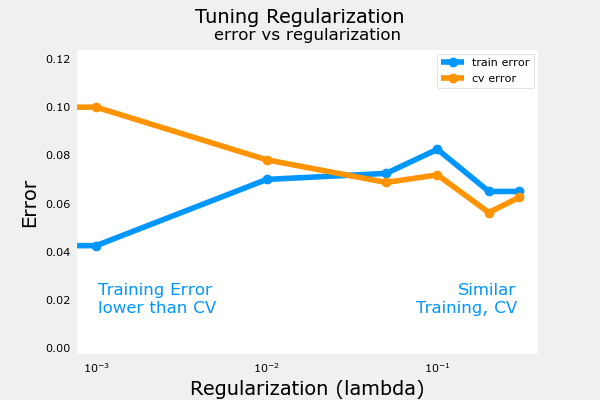

In [55]:
plot_iterate(lambdas, models, X_train, y_train, X_cv, y_cv)

As regularization is increased, the performance of the model on the training and cross-validation data sets converge. For this data set and model, lambda > 0.01 seems to be a reasonable choice.

<a name="7.1"></a>
### 7.1 Test
Let's try our optimized models on the test set and compare them to 'ideal' performance. 

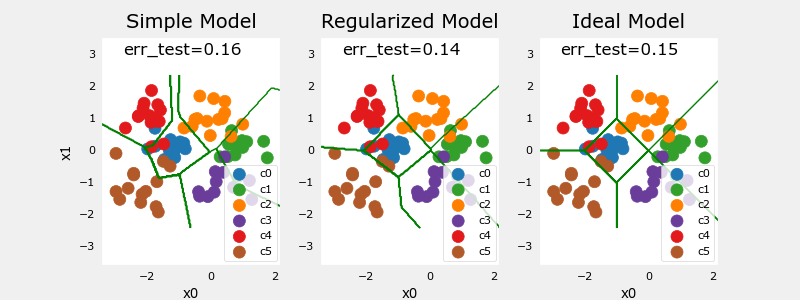

In [56]:
plt_compare(X_test,y_test, classes, model_predict_s, model_predict_r, centers)

Our test set is small and seems to have a number of outliers so classification error is high. However, the performance of our optimized models is comparable to ideal performance.

## Congratulations! 
You have become familiar with important tools to apply when evaluating your machine learning models. Namely:  
* splitting data into trained and untrained sets allows you to differentiate between underfitting and overfitting
* creating three data sets, Training, Cross-Validation and Test allows you to
    * train your parameters $W,B$ with the training set
    * tune model parameters such as complexity, regularization and number of examples with the cross-validation set
    * evaluate your 'real world' performance using the test set.
* comparing training vs cross-validation performance provides insight into a model's propensity towards overfitting (high variance) or underfitting (high bias)